## Brief Background About Kickstarter

* **What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

* **How does it work?**

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

If a project is successfully funded, Kickstarter applies a 5% fee to the funds collected.

## **Data Parameter**





* `train.csv` -

`ID` - ID of the fundraiser

`name` - Name of the fundraiser

`category` - Category of Fundraiser

`main_category` - Main category of fundraiser

`currency` - Currency in which the amount is raised

`deadline` - Deadline/Last date of fundraiser

`goal` - Goal amount of fundraiser

`launched` - Launching date of fundraiser

`pledged` - Amount collected by the fundraiser

`state` - State of the fundraiser **(success/failed)**

`backers` - Number of donators/contributers

`country` - Country of fundraiser

`usd pledged` - Conversion in USD of pledged column **(done by kickstarter)**

`usd_pledged_real` - Conversion in USD of pledged column **(done by Fixer.io API)**

`usd_goal_real` - Goal Amount Converted in USD

### Load Dataset From Kaggle


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"majdshalian","key":"94d38e0c56e0a1baac32971857114357"}'}

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 67 Jul  2 16:08 kaggle.json
/content


In [3]:
!kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                      25KB  2023-04-13 09:55:16          39485       1130  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                            6KB  2023-05-28 18:26:48           6700        171  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                22KB  2023-05-12 13:06:39           8338        173  1.0              
mohithsairamreddy/salary-data                

In [4]:
!kaggle datasets download -d kemical/kickstarter-projects -p /content/ks-projects

 90% 33.0M/36.8M [00:00<00:00, 61.0MB/s]
100% 36.8M/36.8M [00:00<00:00, 59.5MB/s]


In [5]:
!unzip /content/ks-projects/kickstarter-projects.zip -d /content

Archive:  /content/ks-projects/kickstarter-projects.zip
  inflating: /content/ks-projects-201612.csv  
  inflating: /content/ks-projects-201801.csv  


## **Importing Libraries**

In [6]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To keep track of status of loop
from tqdm import tqdm

# To supress warnings
import warnings
warnings.filterwarnings('ignore')


import os
import seaborn as sns
import matplotlib.pyplot as plt

import shutil
from sklearn.metrics import confusion_matrix,classification_report


## **Reading Data**

In [7]:
path='/content/ks-projects-201801.csv'
df= pd.read_csv(path,encoding ='latin1')

In [8]:
df

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
4          Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                 ...           ...      ...         ...      ...   
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  usd pledged  \
0       2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1       2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2       2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3       2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4       2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   
...                     ...      ...       ...      ...     ...          ...   
378656  2014-09-17 02:35:30     25.0  canceled        1      US         25.0   
378657  2011-06-22 03:35:14    155.0    failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0    failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0    failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0    failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
4                 1283.0       19500.00  
...                  ...            ...  
378656              25.0       50000.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[378661 rows x 15 columns]

#### **Checking the info and description of the data**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [11]:
df.describe()

ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count      3.786610e+05   3.786610e+05  
mean       9.058924e+03   4.545440e+04  
std        9.097334e+04   1.152950e+06  
min        0.000000e+00   1.000000e-02  
25%        3.100000e+01   2.000000e+03  
50%        6.243300e+02   5.500000e+03  
75%        4.050000e+03   1.550000e+04  
max        2.033899e+07   1.663614e+08

#### **Checking the first 5 rows of data**

In [12]:
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

#### **Checking the unique values**

In [13]:
for column in df.columns[1:]:
    print('\n\n',column,'\n',df[column].unique())



 name 
 ['The Songs of Adelaide & Abullah'
 'Greeting From Earth: ZGAC Arts Capsule For ET' 'Where is Hank?' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!']


 category 
 ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 

#### **Cheking for null values**

In [14]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [15]:
# Dropping NAN Names as the name and categories doesnt match
df = df[df['name'].notna()]

# Replacing usd pledge null values with its median
median = df['usd pledged'].median()
df['usd pledged'].fillna(median,inplace=True)

In [16]:
df.isnull().mean()

ID                  0.0
name                0.0
category            0.0
main_category       0.0
currency            0.0
deadline            0.0
goal                0.0
launched            0.0
pledged             0.0
state               0.0
backers             0.0
country             0.0
usd pledged         0.0
usd_pledged_real    0.0
usd_goal_real       0.0
dtype: float64

## **EXPLORATORY DATA ANALYSIS**

In [17]:
con_var = []
cat_var = []

for feature in df.columns:
    if df[feature].dtype !='object' and len(df[feature].unique()) >25:
        con_var.append(feature)
    else:
        cat_var.append(feature)

In [18]:
print("Continuous Variables ARE --- \n",con_var)
print("\n\nCategorical Variables ARE --- \n",cat_var)

Continuous Variables ARE --- 
 ['ID', 'goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


Categorical Variables ARE --- 
 ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']


### **ANALYSING CATEGORICAL VARIABLES**

In [19]:


def top_reccuring_category(df, category):
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

    # AXIS-1 for PIE PLOT
    vc = df[category].value_counts()
    if len(vc) >= 10:
        vc = df[category].value_counts()[:10]

    # Set the title for axis-1
    ax1.set_title(f"TOP {len(vc)} RECURRING {category.upper()} FOR FUNDRAISING")
    ax1.set_ylabel("")
    # Plot a circle for donot plot
    my_circle = plt.Circle((0, 0), .8, color='white')
    # Plot a pie plot
    vc.plot(kind='pie', ax=ax1, cmap='Set2', autopct='%1.0f%%', shadow=True)
    # Add the circle on top of donut plot
    ax1.add_artist(my_circle)

    # AXIS -2 for BAR PLOT
    ax2.set_title(f"TOP {len(vc)} RECURRING {category.upper()} FOR FUNDRAISING")
    ax = vc.plot(kind='bar', ax=ax2, cmap='Set2')

    # Annotate the bars of bar plot
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()))

    plt.tight_layout(pad=3)
    # Save the plot
    plt.savefig("plots1/{}_recurring.png".format(category.lower()))
    plt.close()

# Create a folder to save the plots
if not os.path.exists("plots1"):
    os.makedirs("plots1")

categories = ['main_category', 'category', 'country']  # Example categories

# Looping through multiple categories
for category in categories:
    top_reccuring_category(df, category)

print("Plots saved in the 'plots1' folder.")


Plots saved in the 'plots1' folder.


In [20]:
for cat in cat_var:
    top_reccuring_category(df,cat)

#### **State Of Fundraisers With Respect To Main Category**

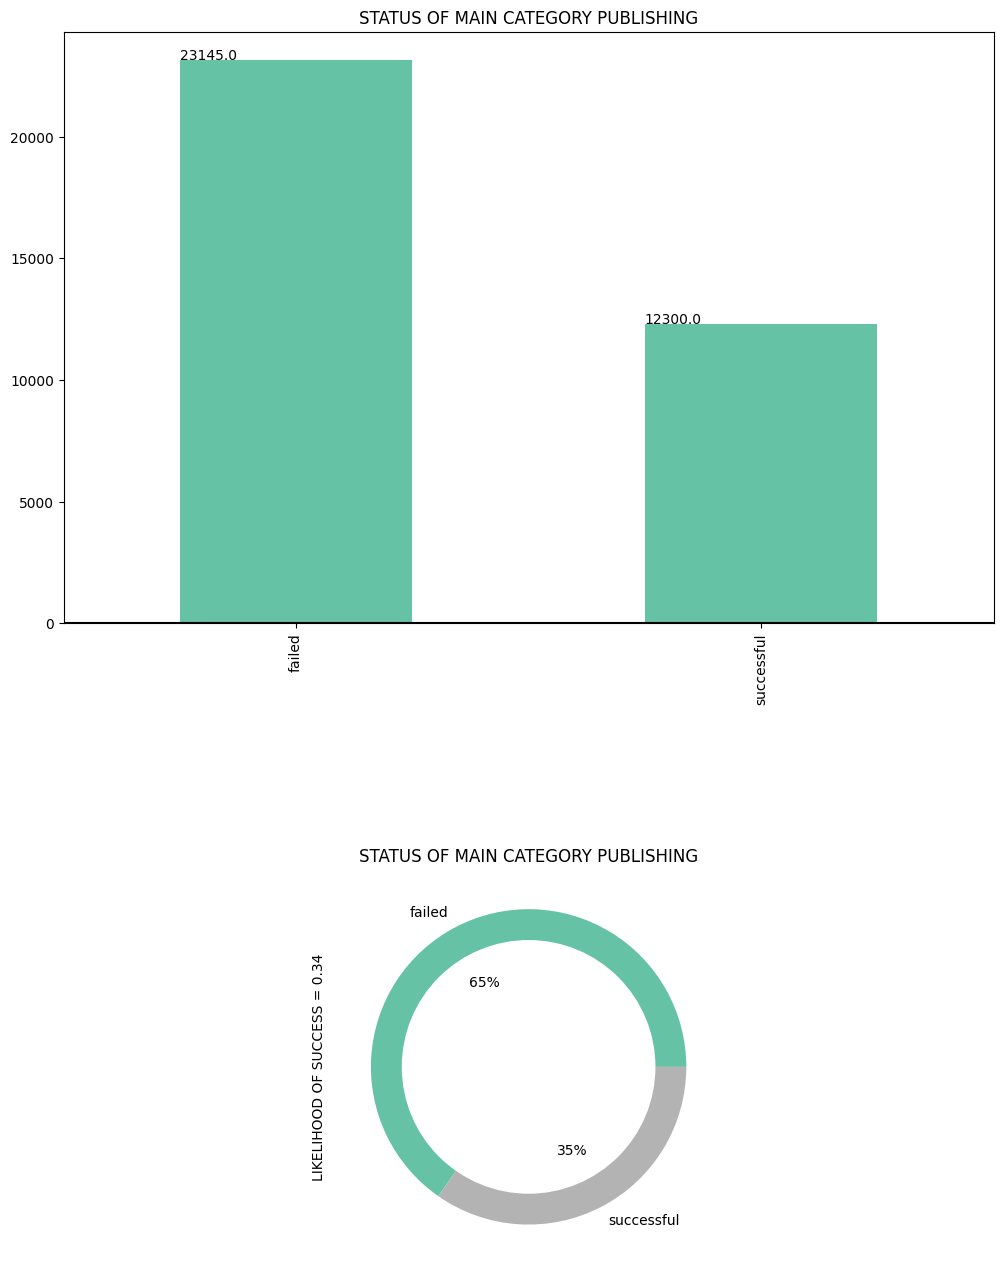

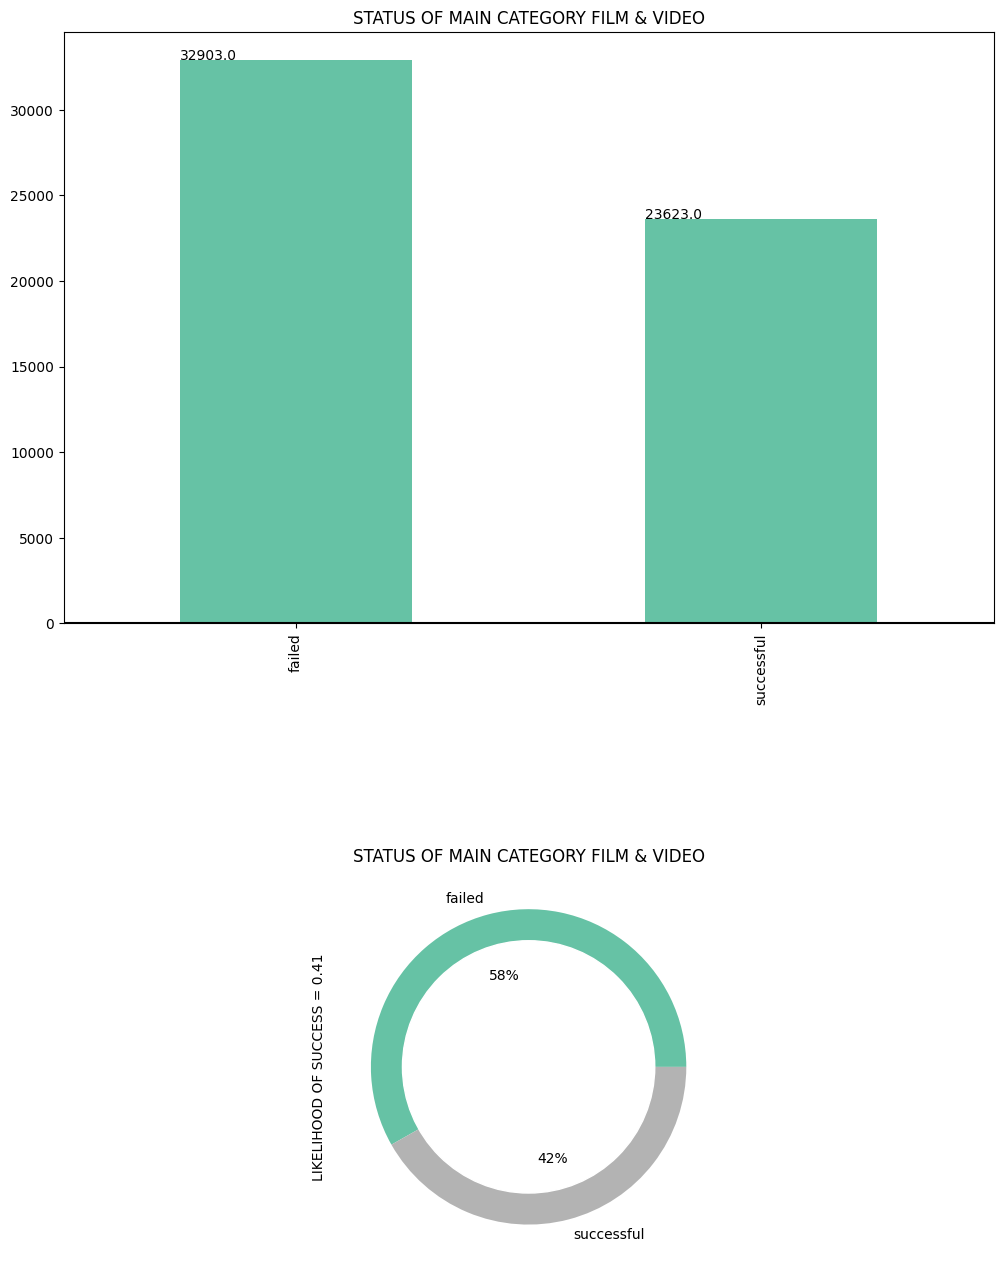

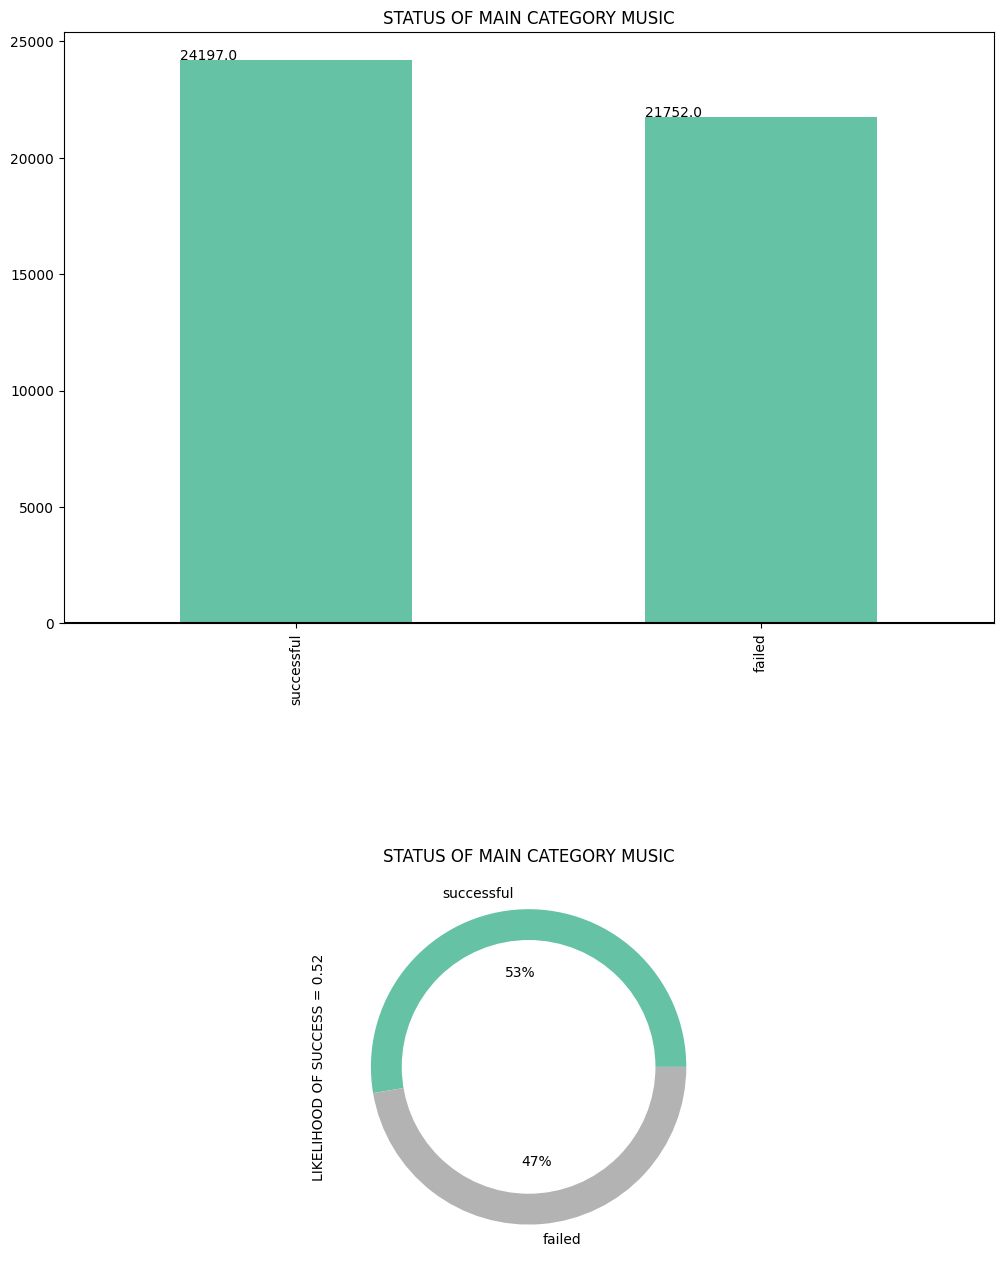

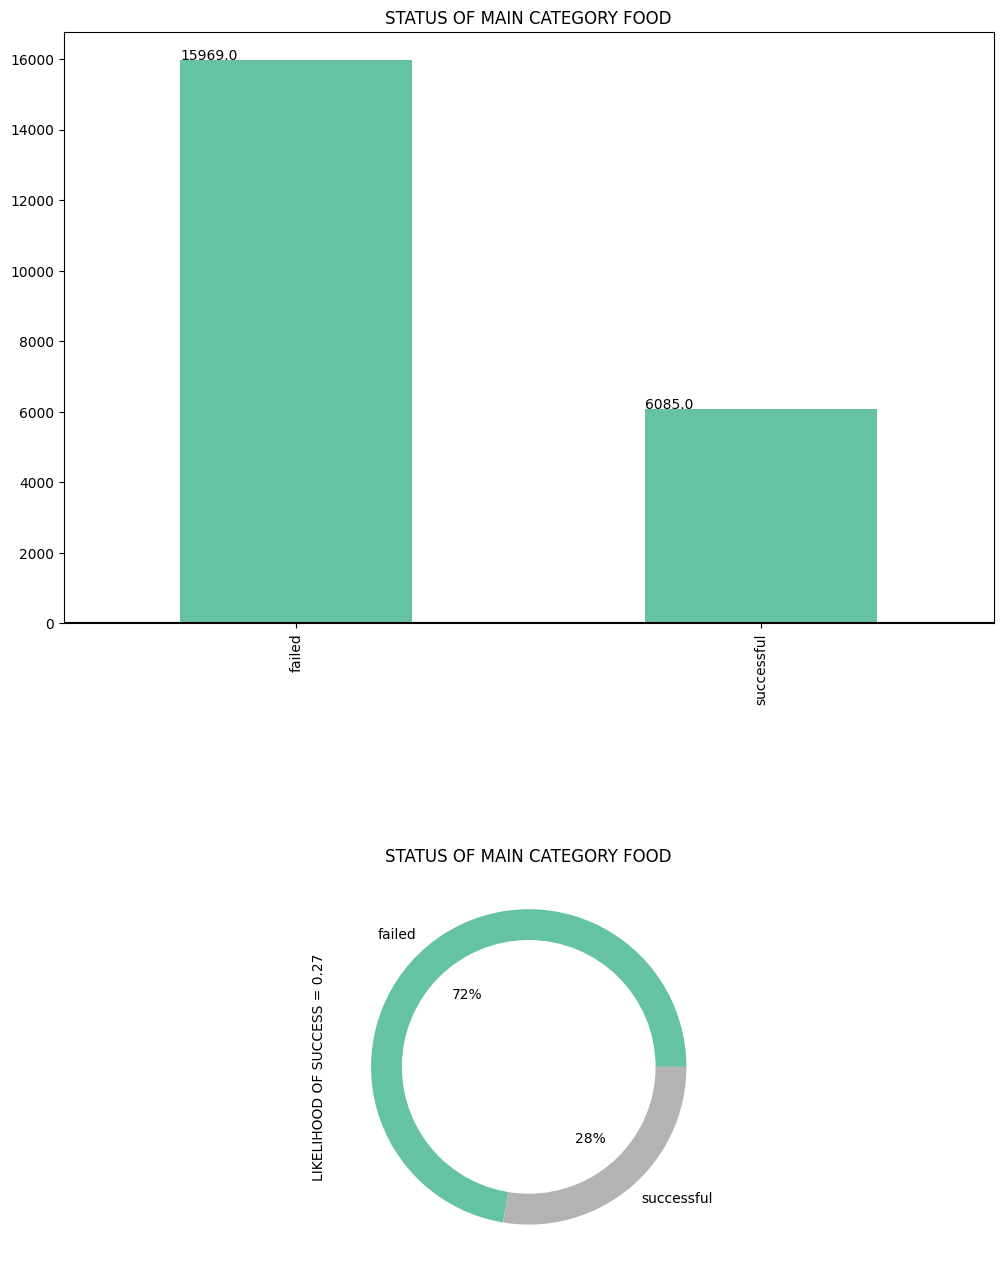

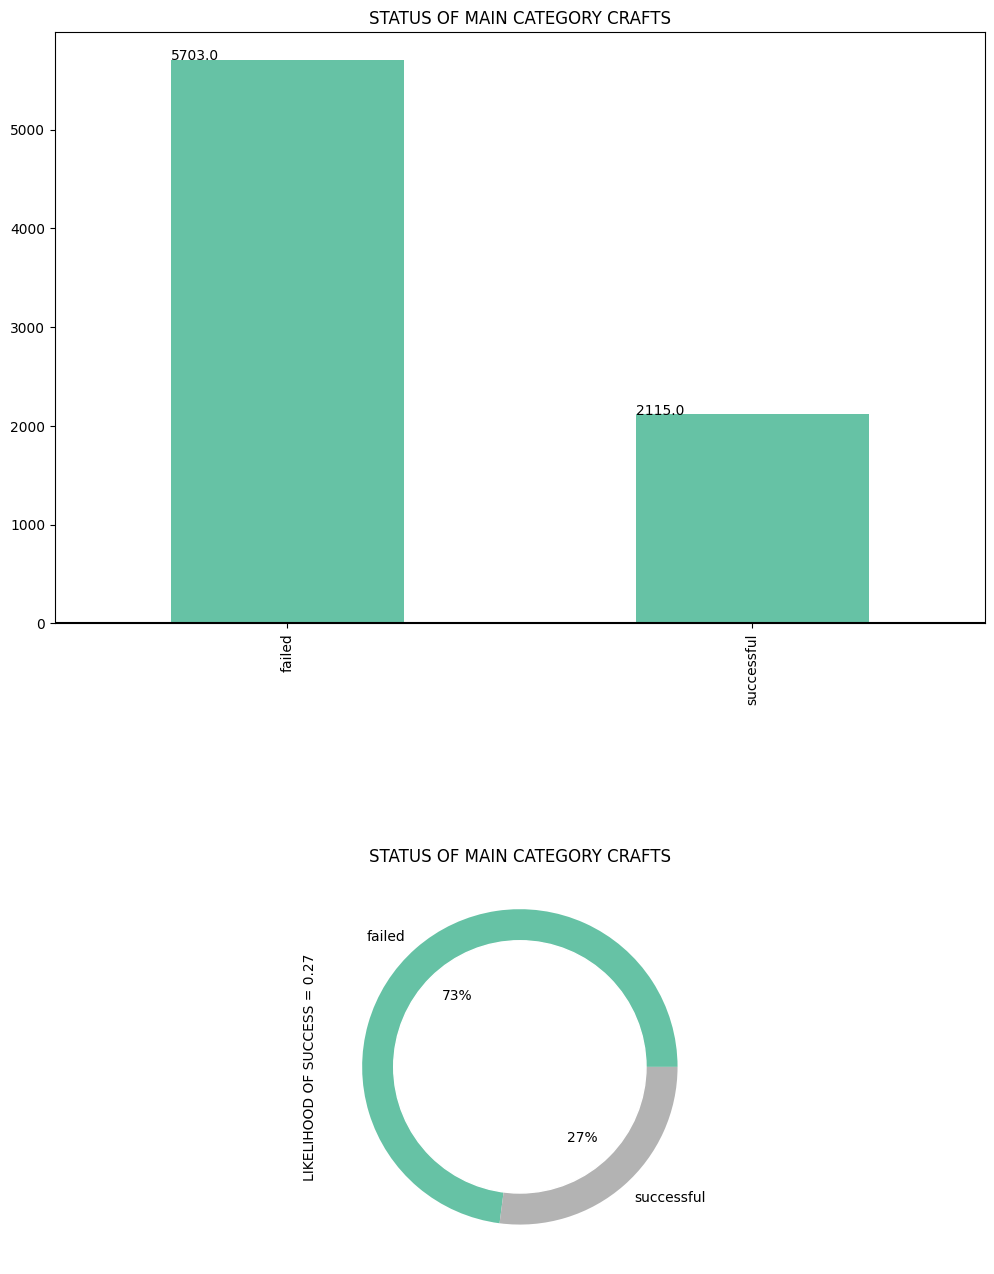

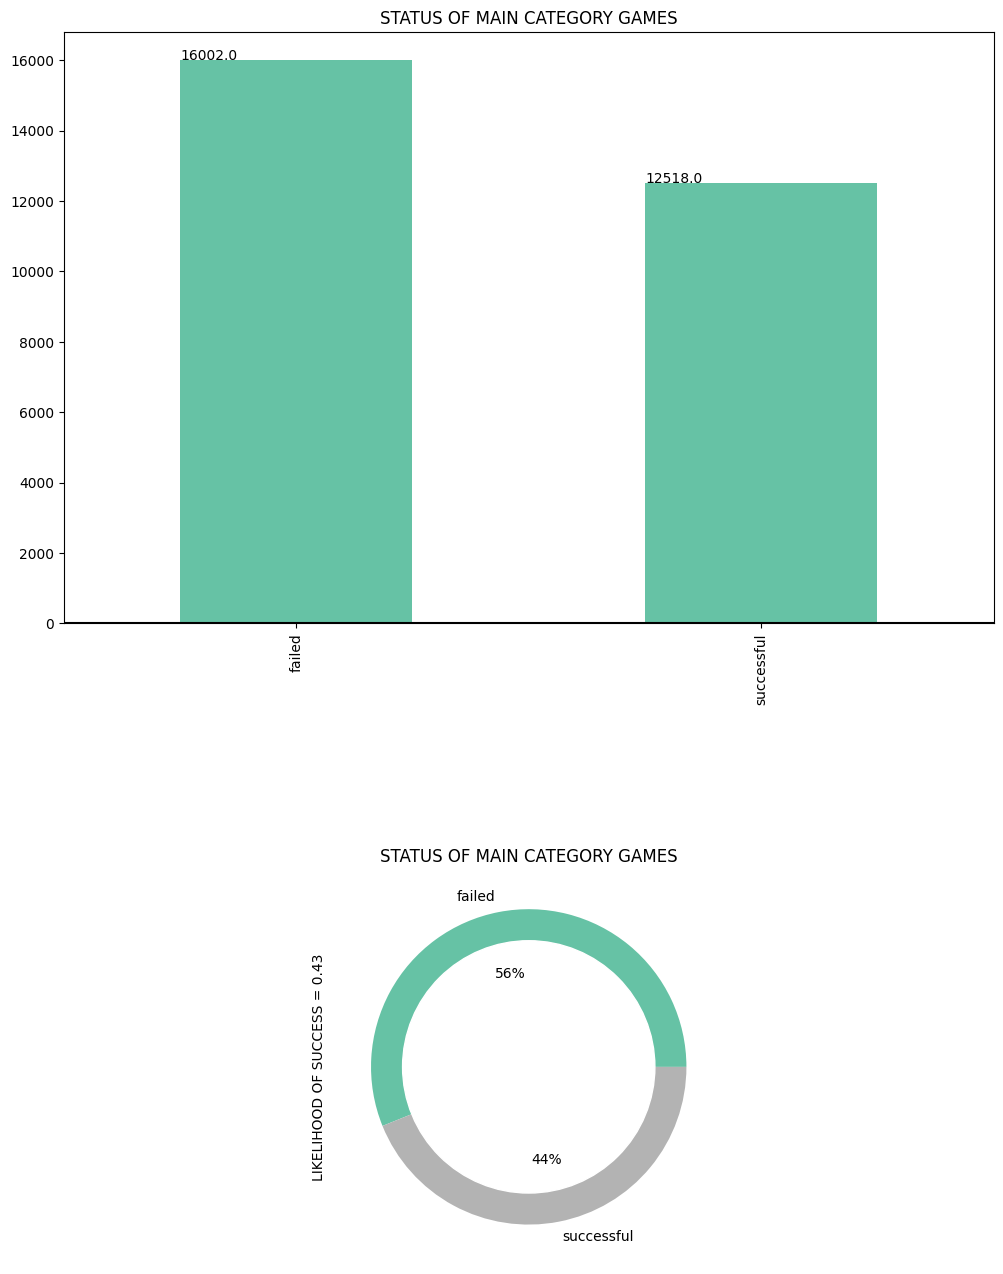

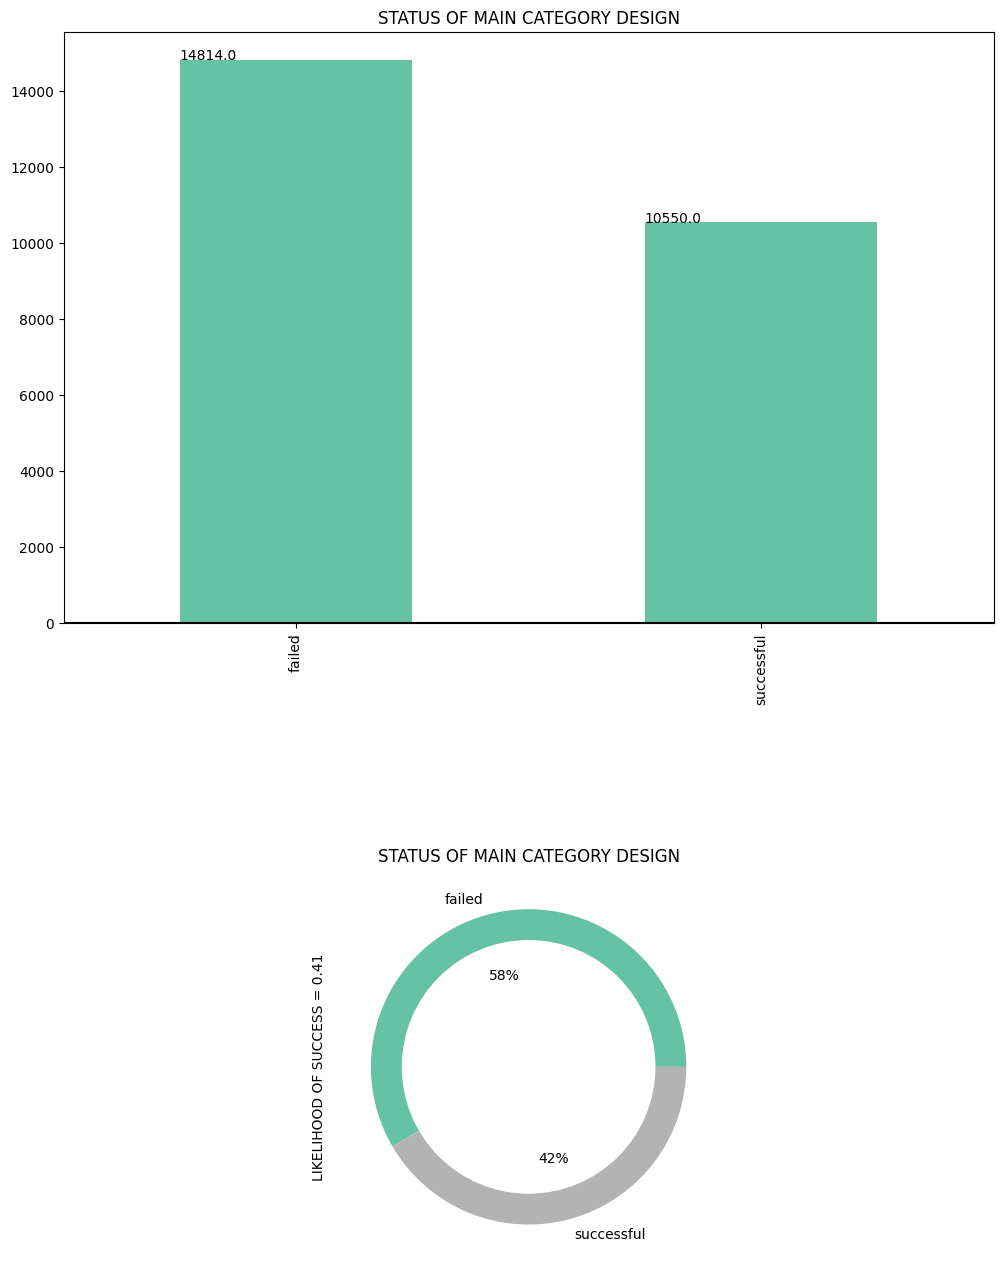

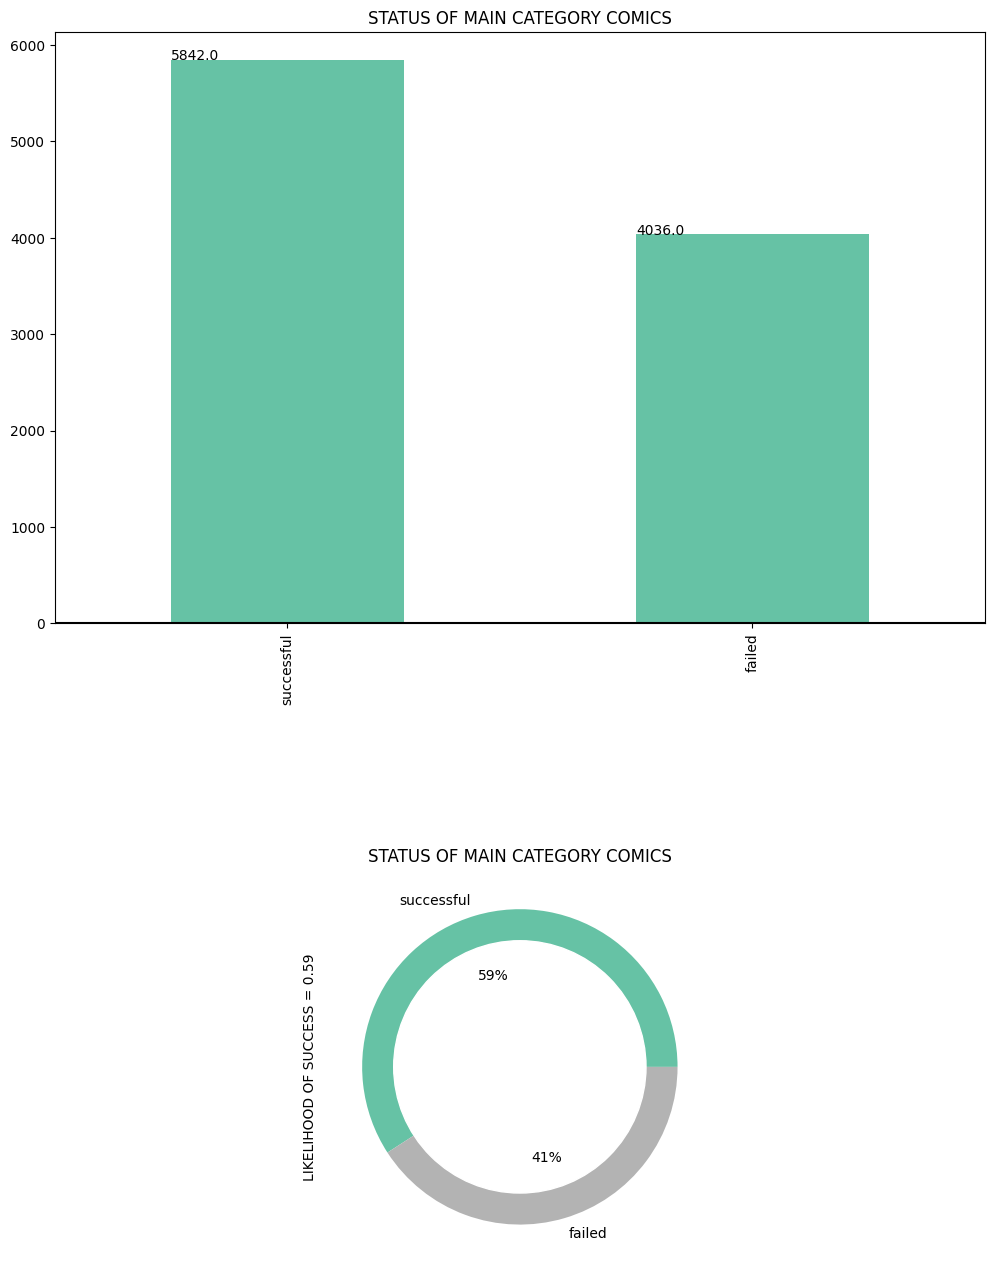

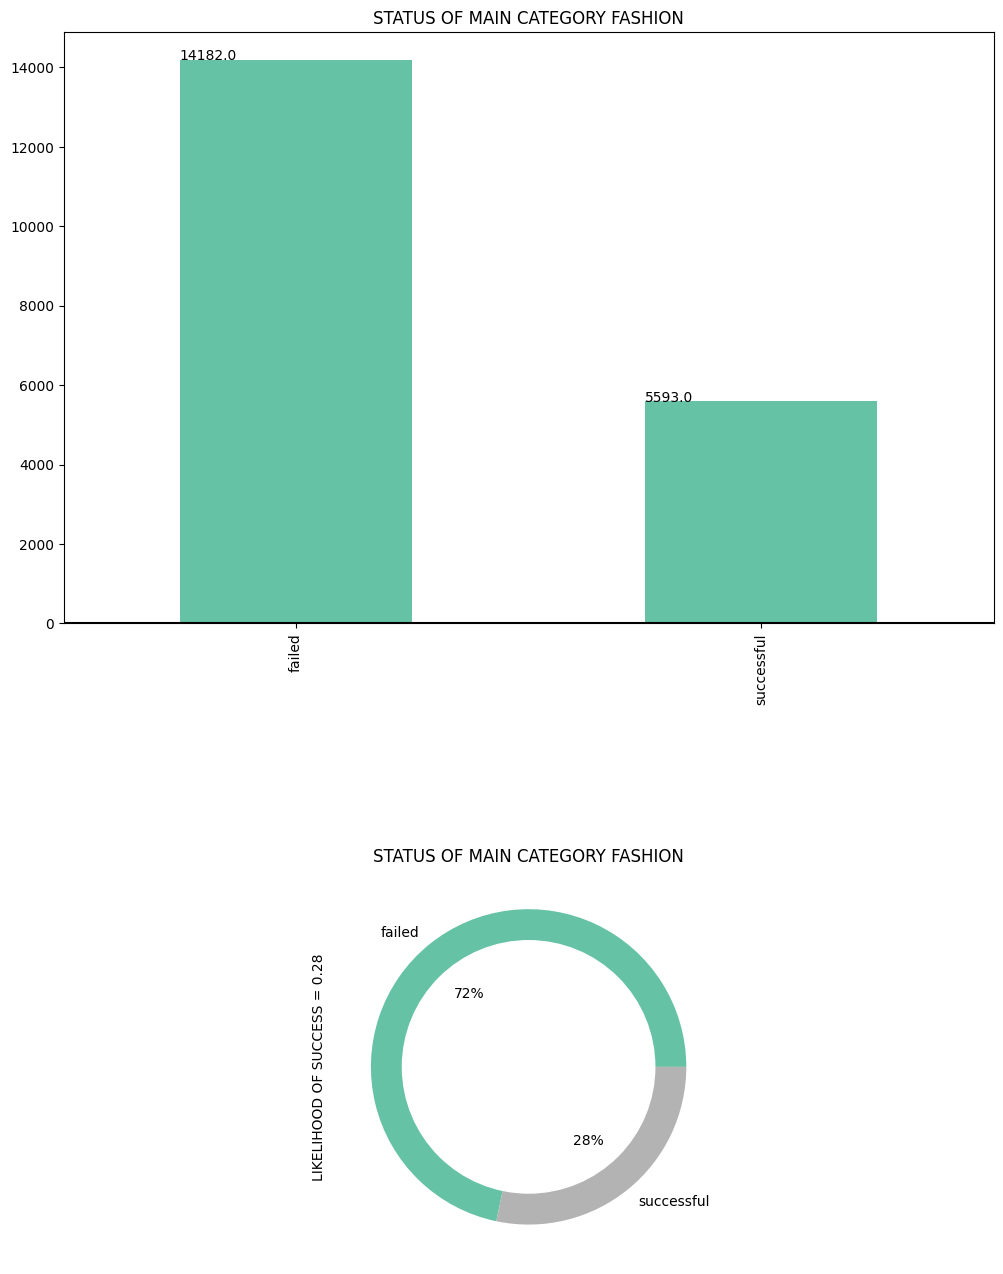

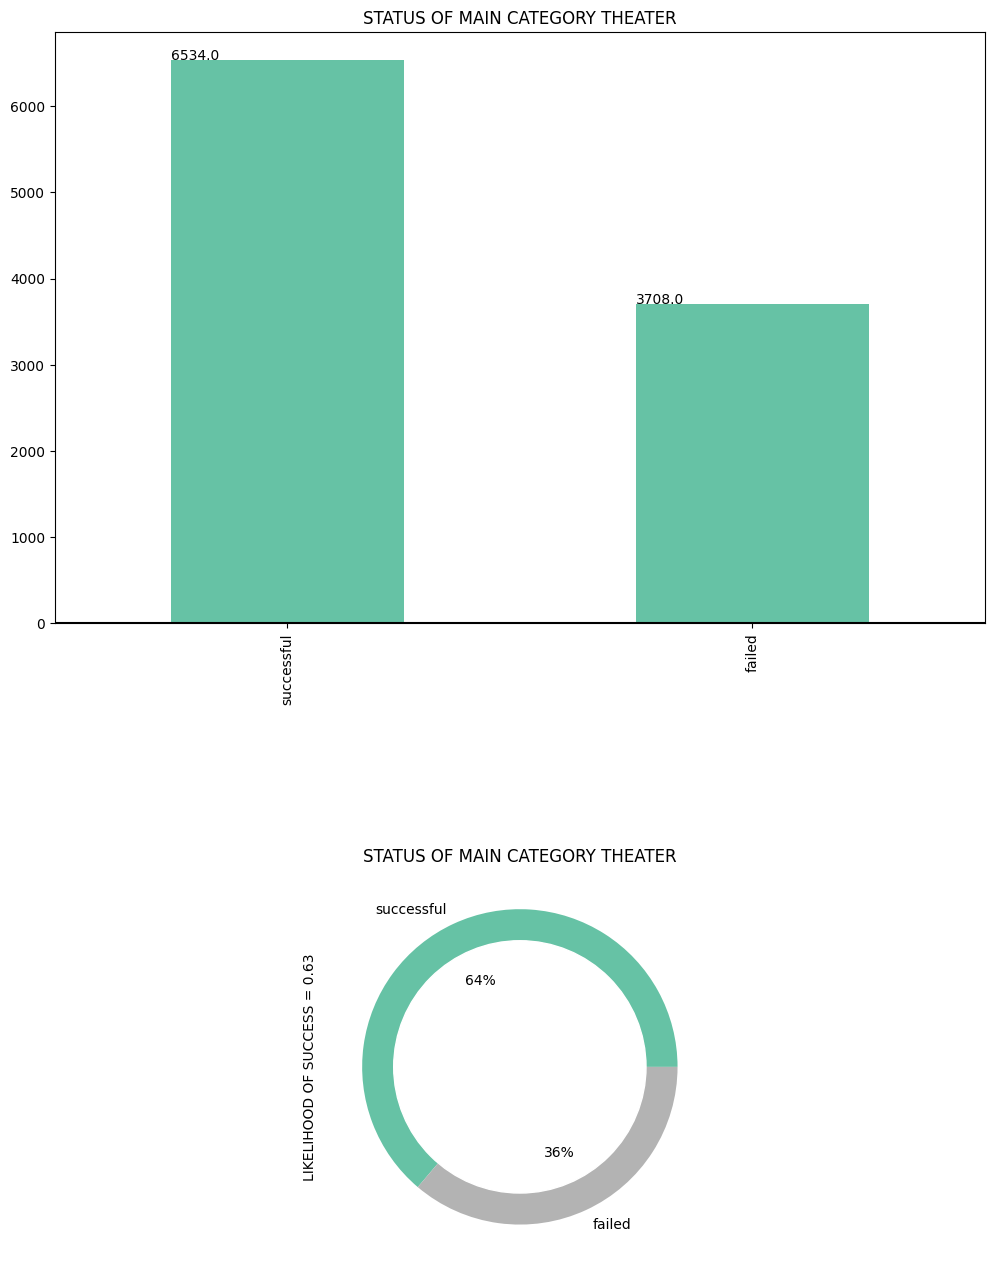

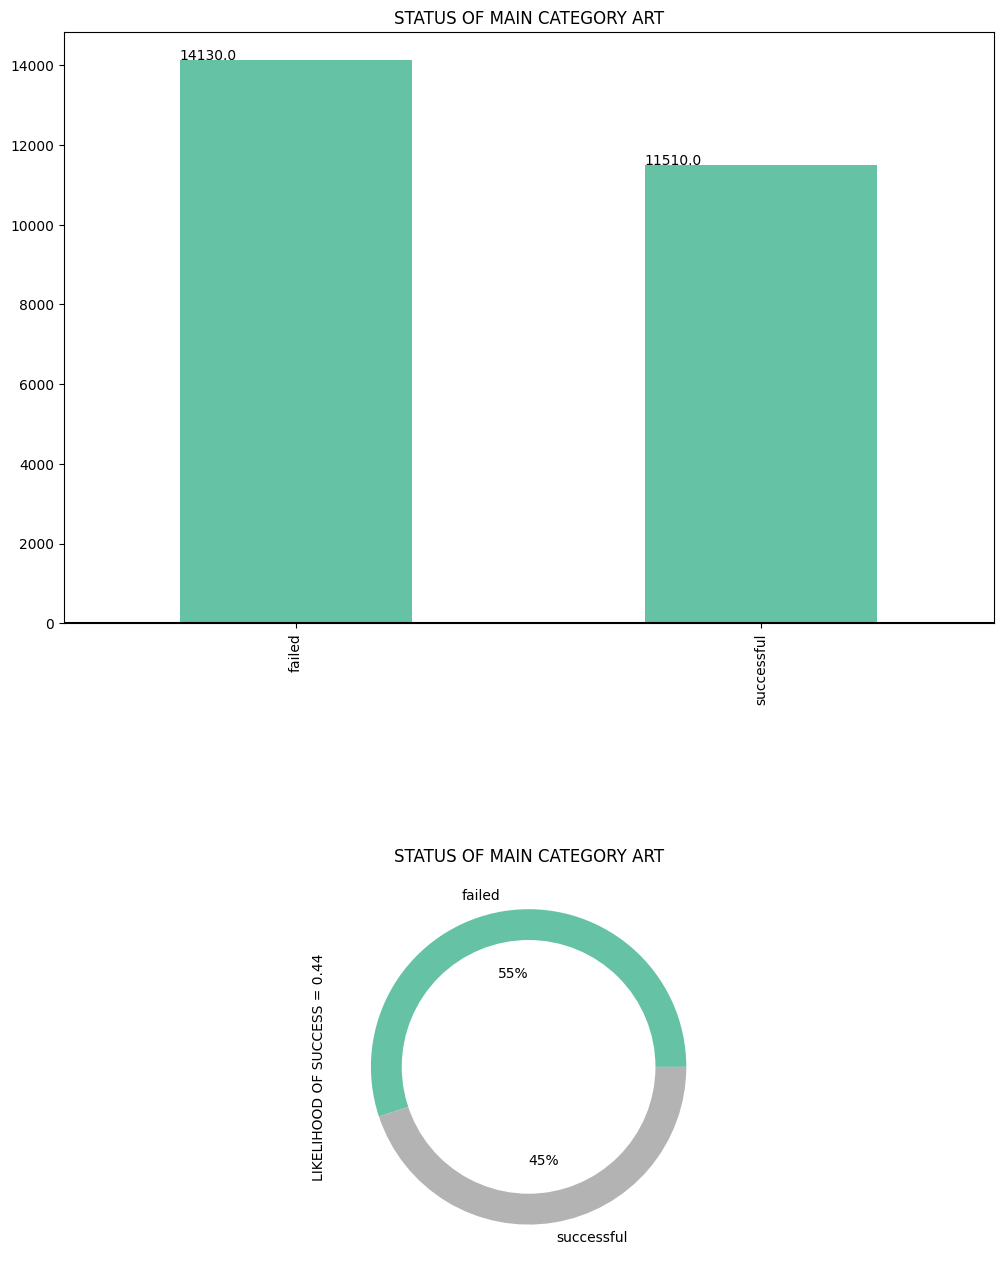

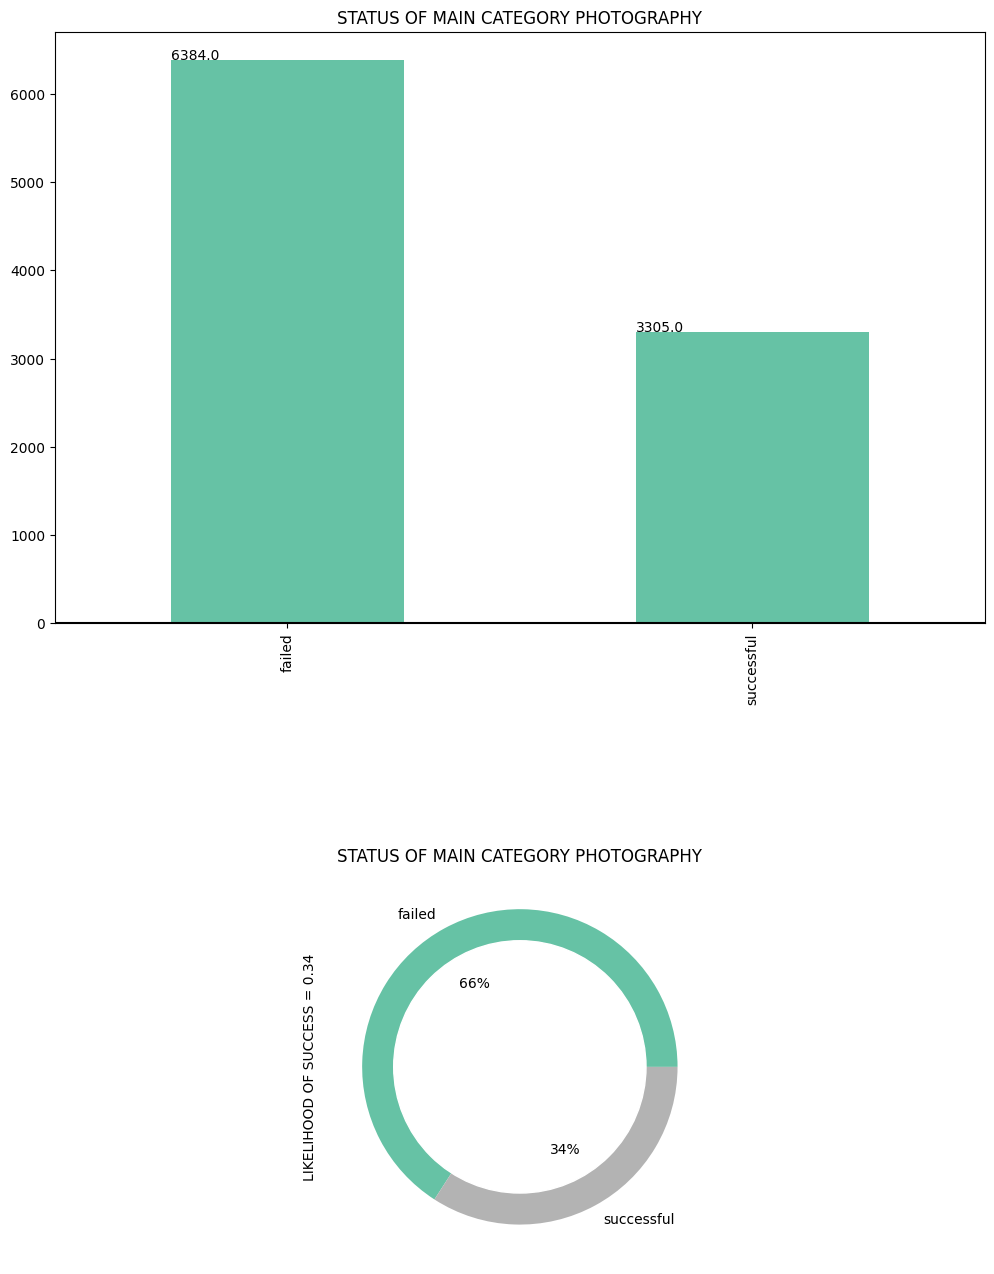

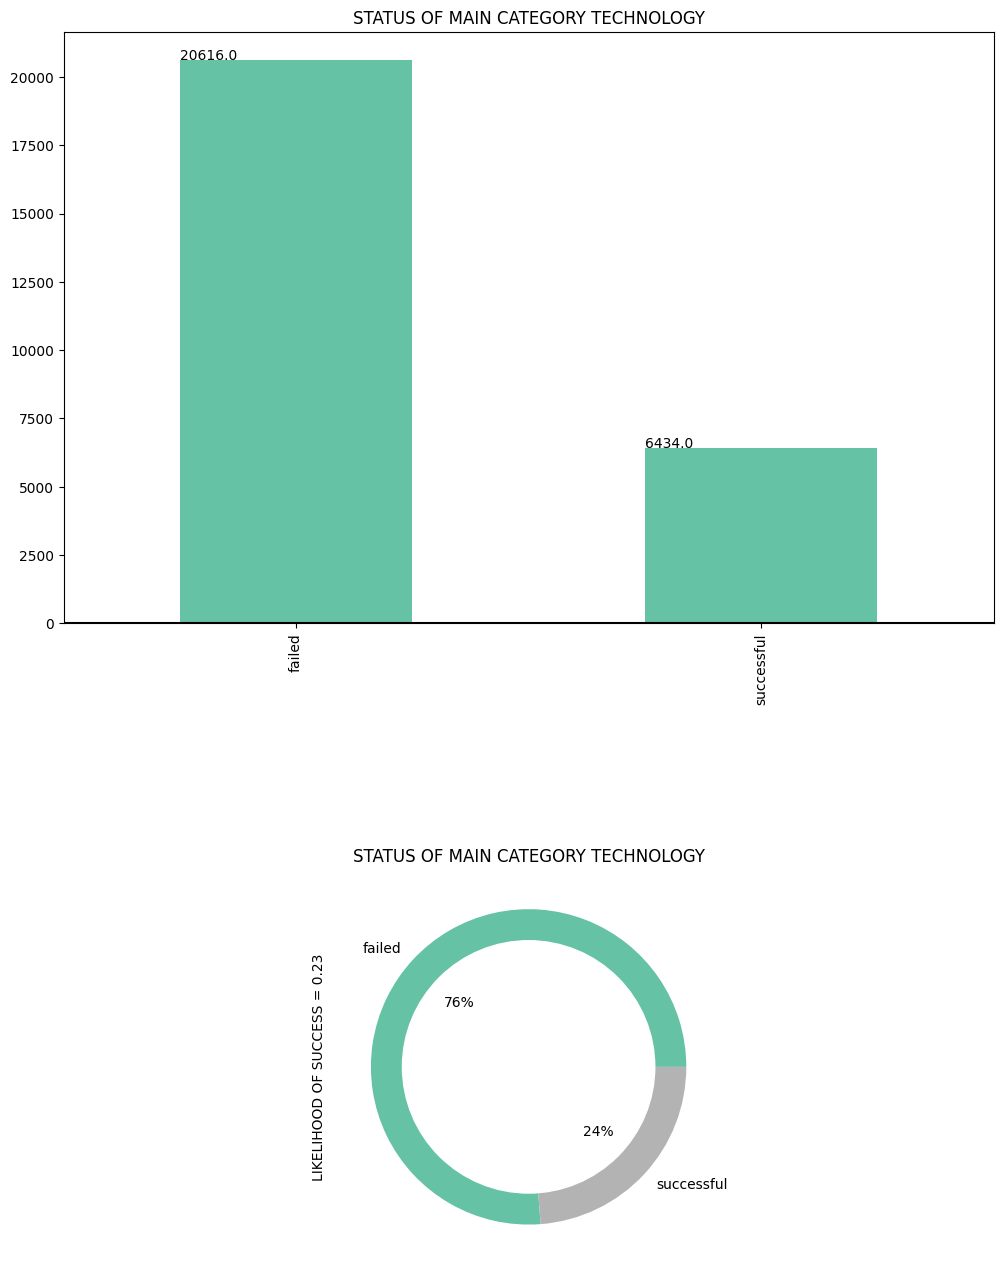

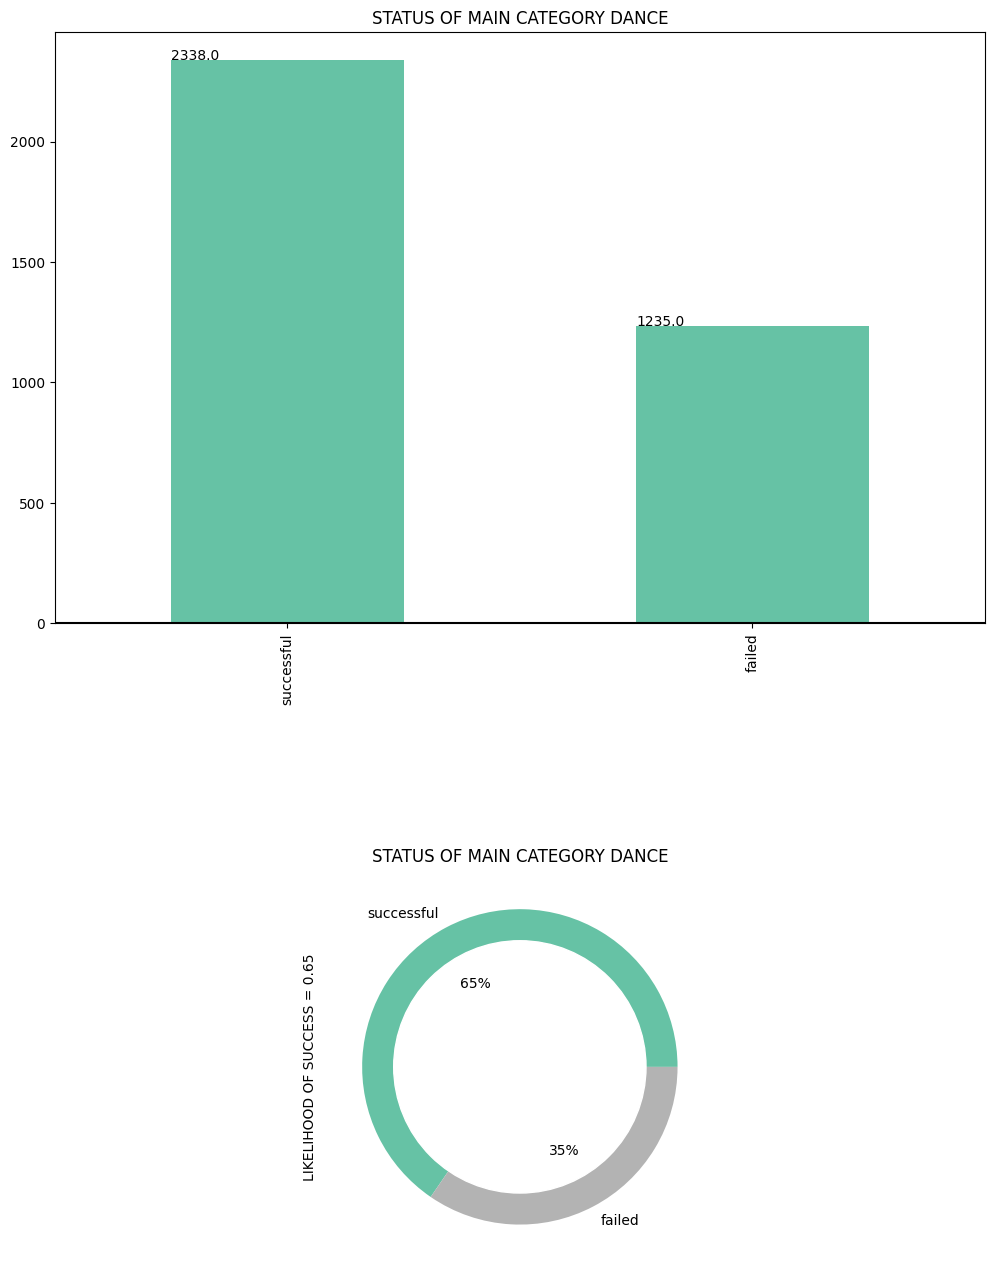

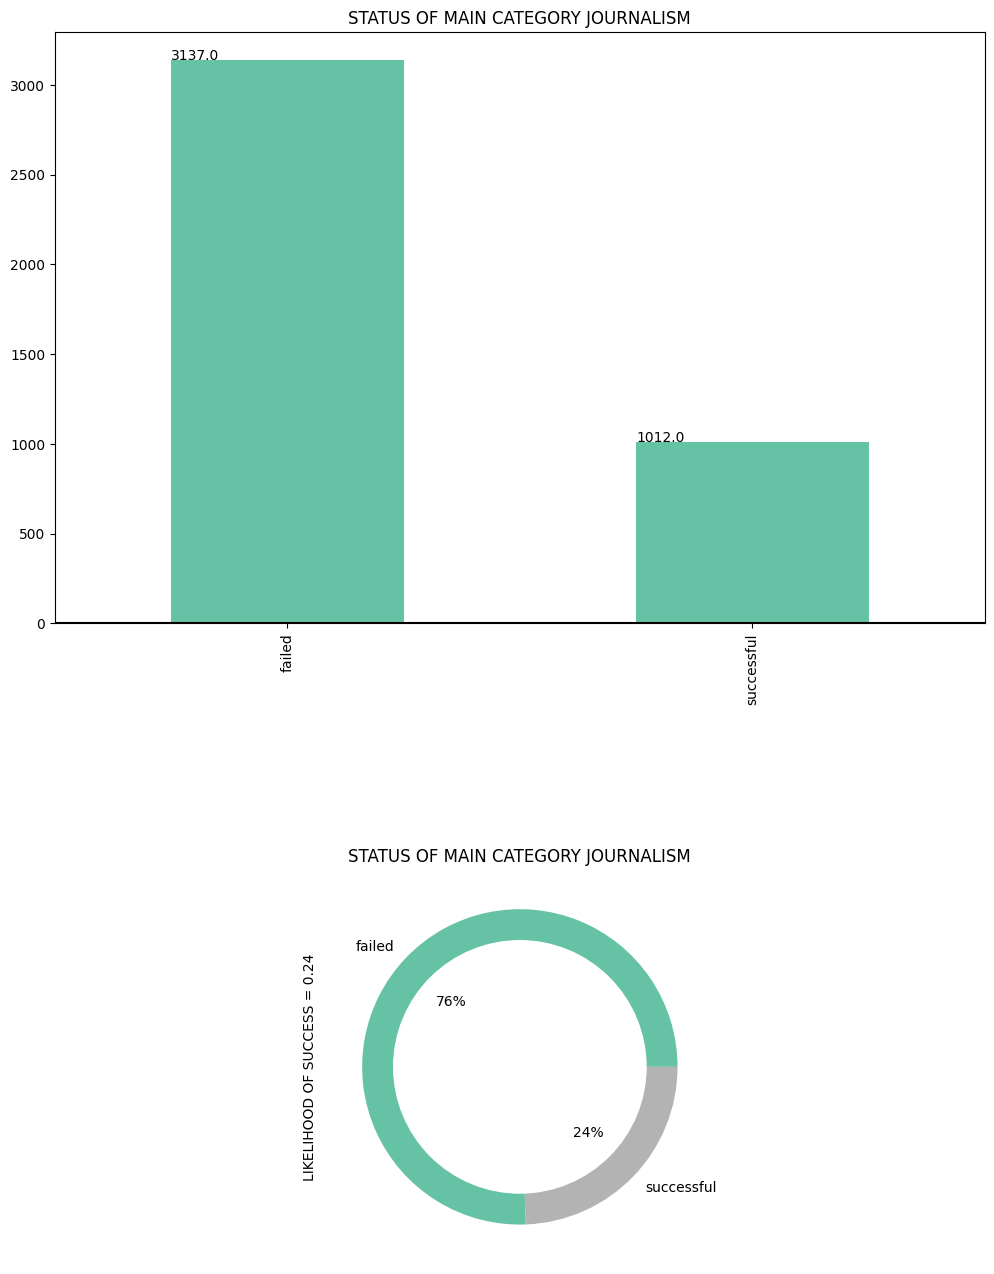


Plots saved in the 'plots2' folder.


In [21]:

# Create a folder to save the plots
if not os.path.exists("plots2"):
    os.makedirs("plots2")

options = ['successful', 'failed']
sample = df[df['state'].isin(options)]
cats = sample['main_category'].unique()

# Looping through multiple categories
for cat in cats:
    x = sample[sample['main_category'] == cat]  # x --> df with a single main_category
    data = x['state'].value_counts()  # value_count of status (key val pair)

    # Figure for bar plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [3, 2]})
    fig.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots
    ax1.set_title("STATUS OF MAIN CATEGORY {}".format(cat.upper()))
    data.plot(kind="bar", cmap='Set2', ax=ax1)
    for p in ax1.patches:
        ax1.annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()))

    # Line between plots
    ax1.axhline(color='black')

    # Figure for pie plot
    ax2.set_title("STATUS OF MAIN CATEGORY {}".format(cat.upper()))
    data.plot(kind='pie', ax=ax2, cmap='Set2', autopct='%1.0f%%')
    my_circle = plt.Circle((0, 0), .8, color='white')
    ax2.add_artist(my_circle)
    # Success Ratio
    success_ratio = str(data['successful'] / data.values.sum())
    success_ratio = "LIKELIHOOD OF SUCCESS = " + success_ratio[0:4]
    ax2.set_ylabel(success_ratio, fontdict={'fontweight': 12})

    # Save the plot
    plt.savefig("plots2/{}.png".format(cat.lower()))
    plt.show()
    print()
    plt.close()

print("Plots saved in the 'plots2' folder.")


#### **State Of Fundraisers With Respect To Country**

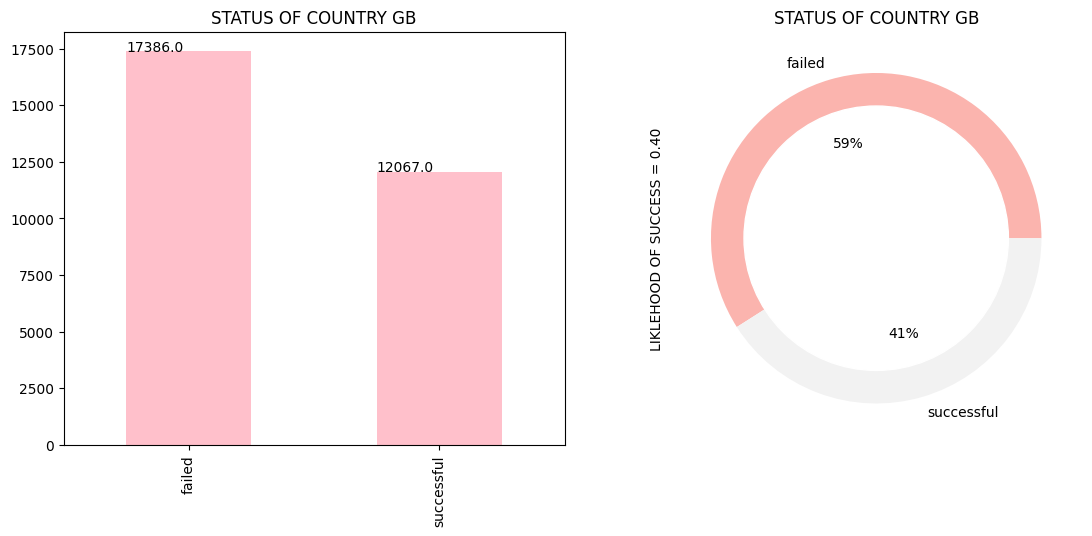

<Figure size 640x480 with 0 Axes>

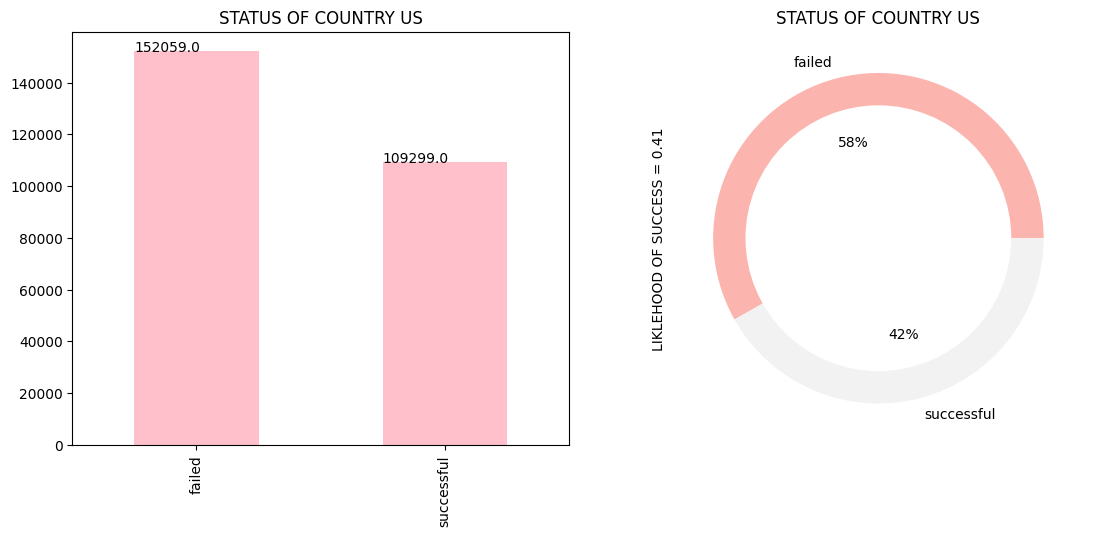

<Figure size 640x480 with 0 Axes>

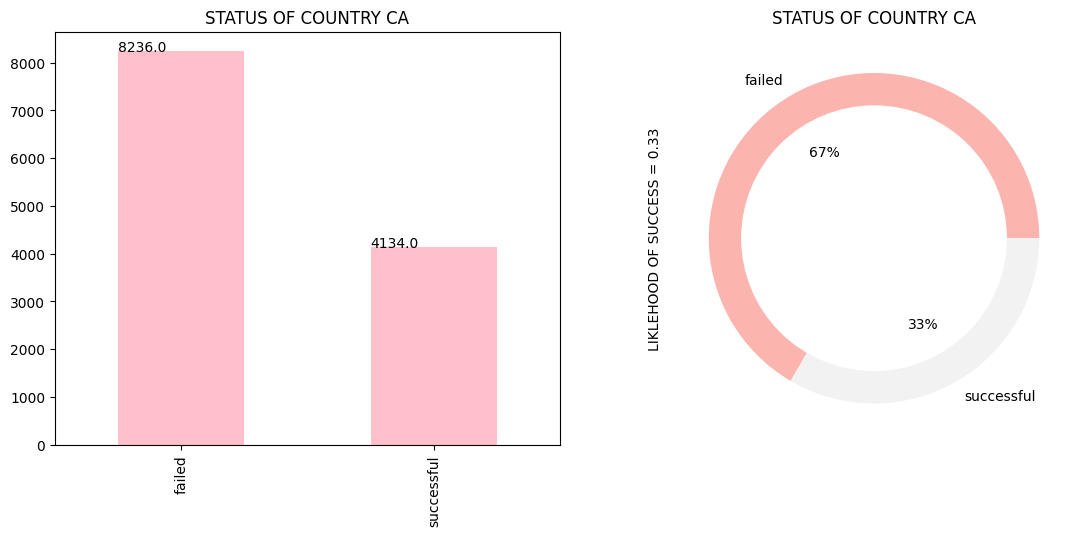

<Figure size 640x480 with 0 Axes>

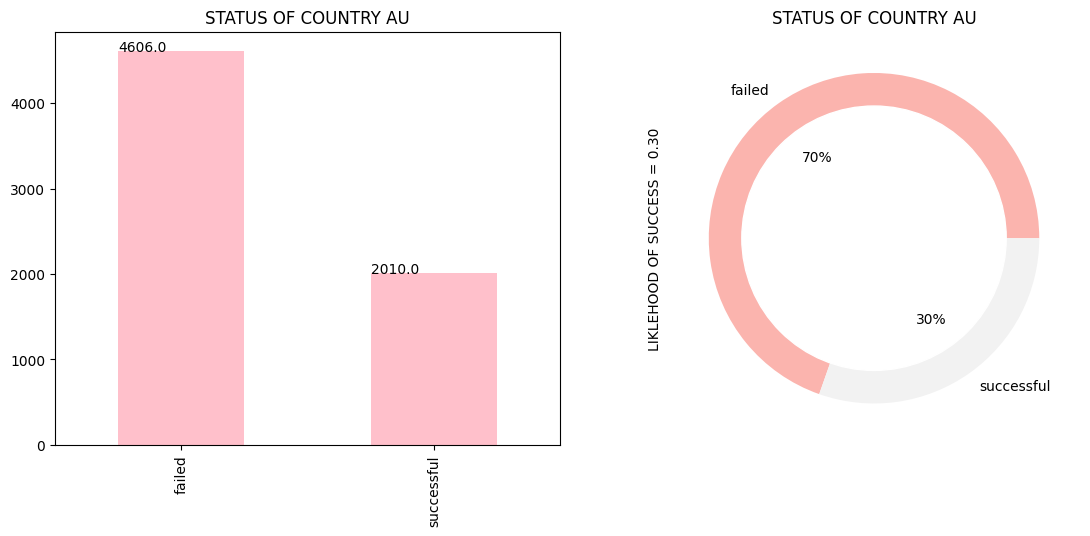

<Figure size 640x480 with 0 Axes>

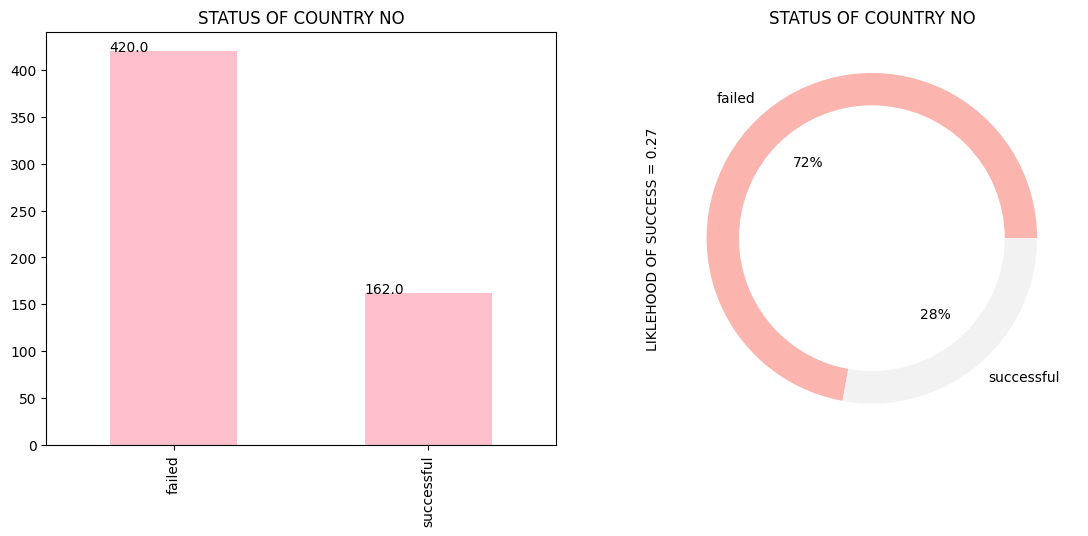

<Figure size 640x480 with 0 Axes>

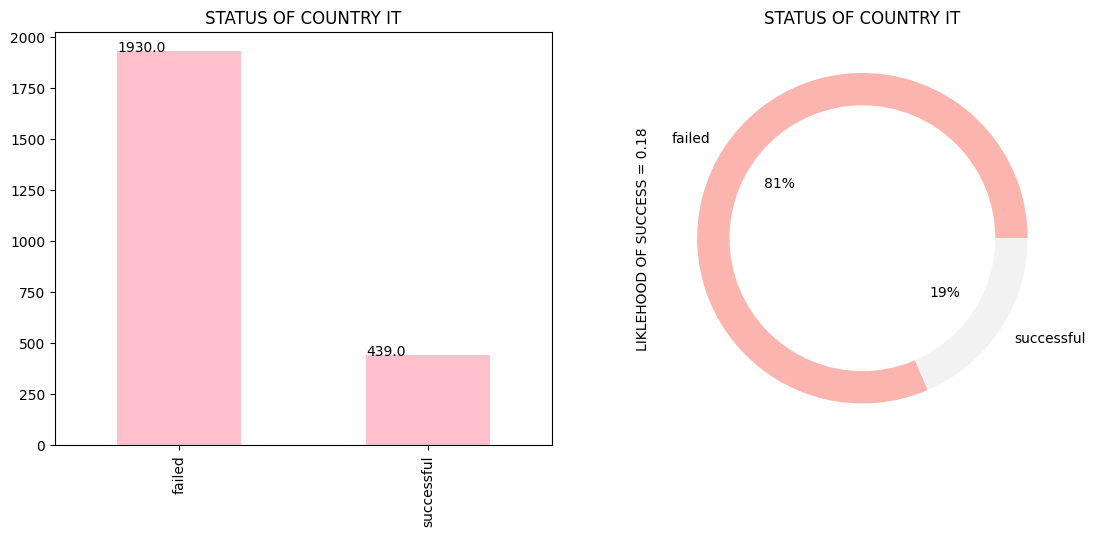

<Figure size 640x480 with 0 Axes>

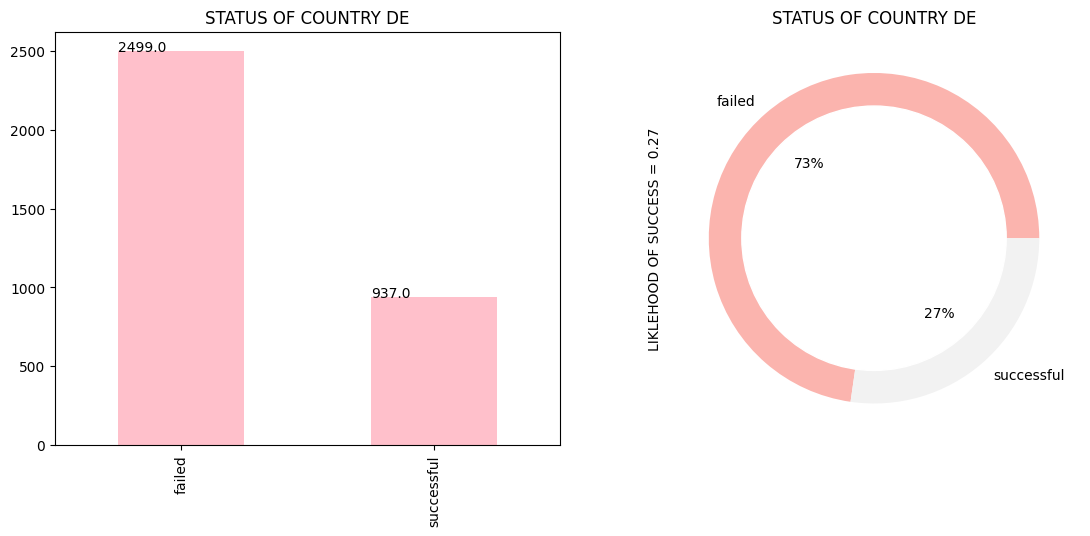

<Figure size 640x480 with 0 Axes>

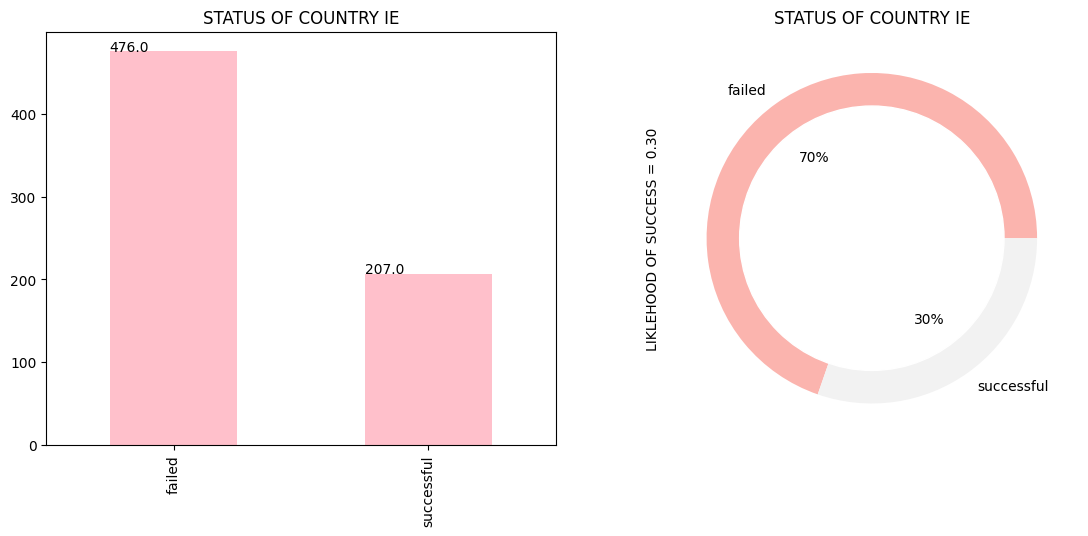

<Figure size 640x480 with 0 Axes>

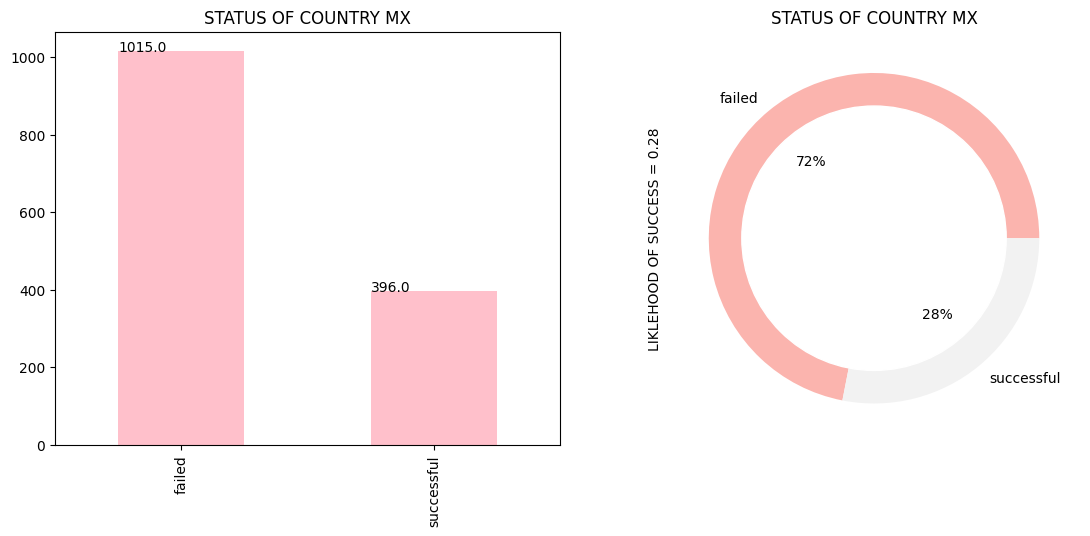

<Figure size 640x480 with 0 Axes>

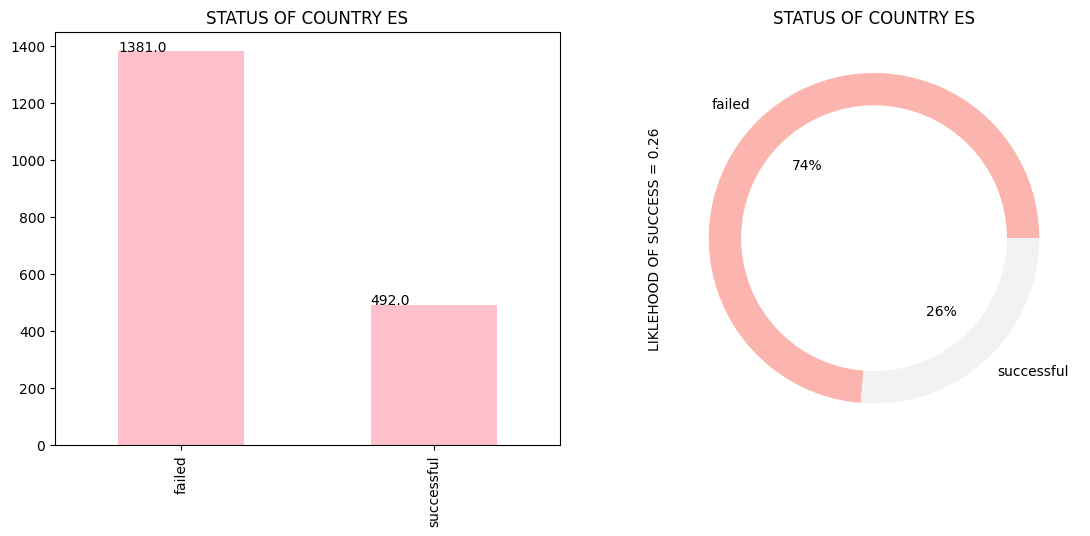

<Figure size 640x480 with 0 Axes>

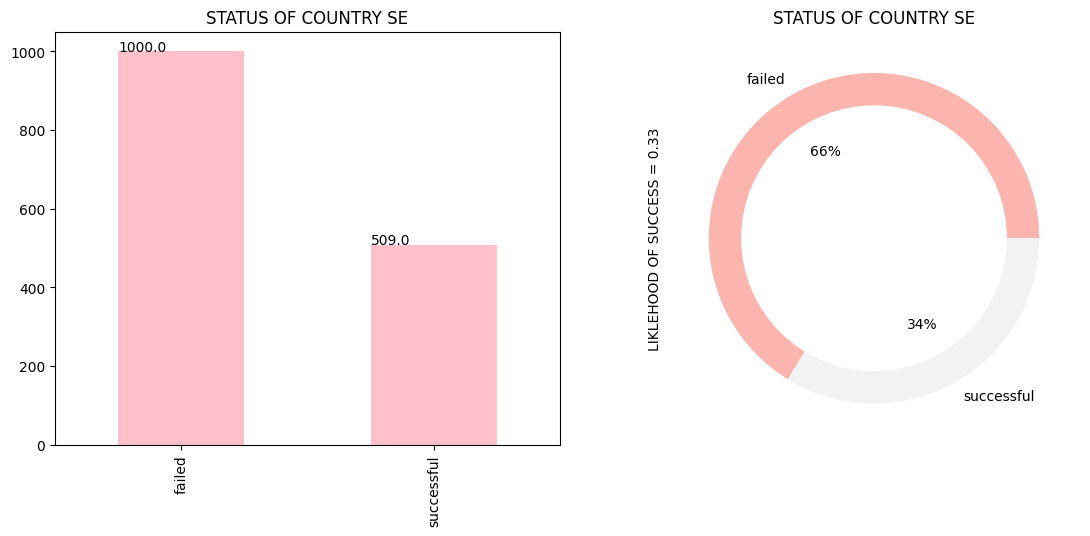

<Figure size 640x480 with 0 Axes>

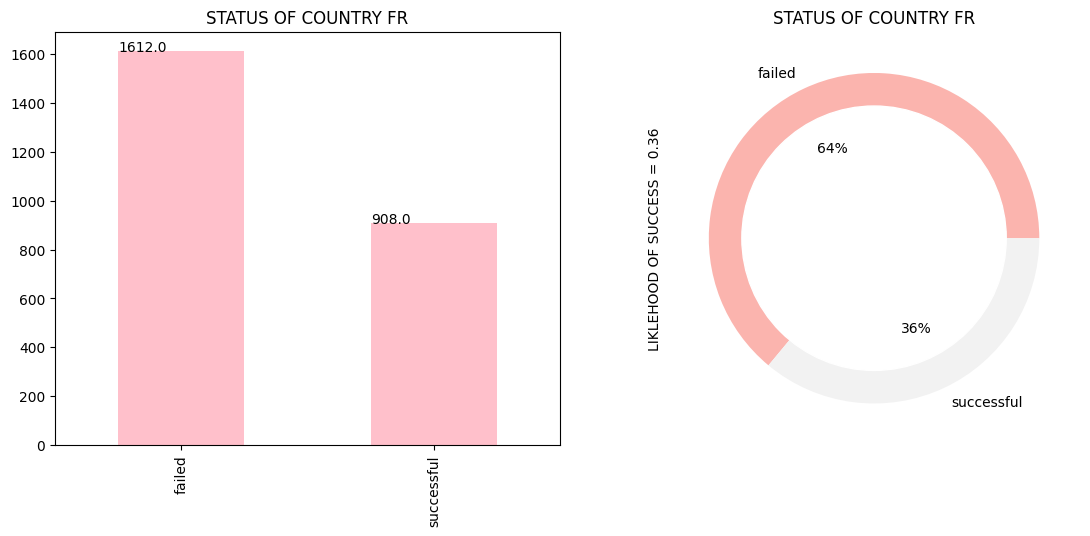

<Figure size 640x480 with 0 Axes>

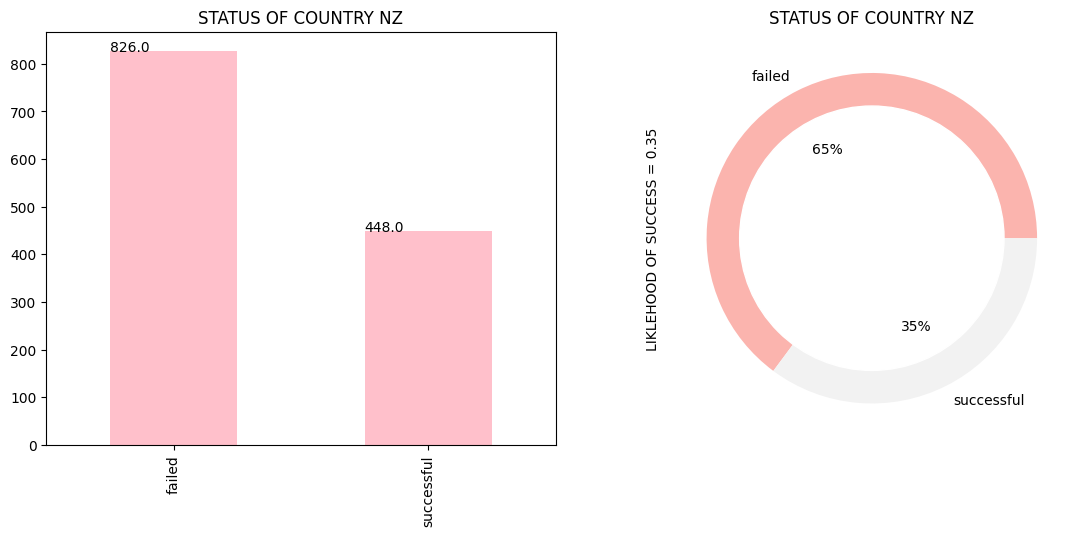

<Figure size 640x480 with 0 Axes>

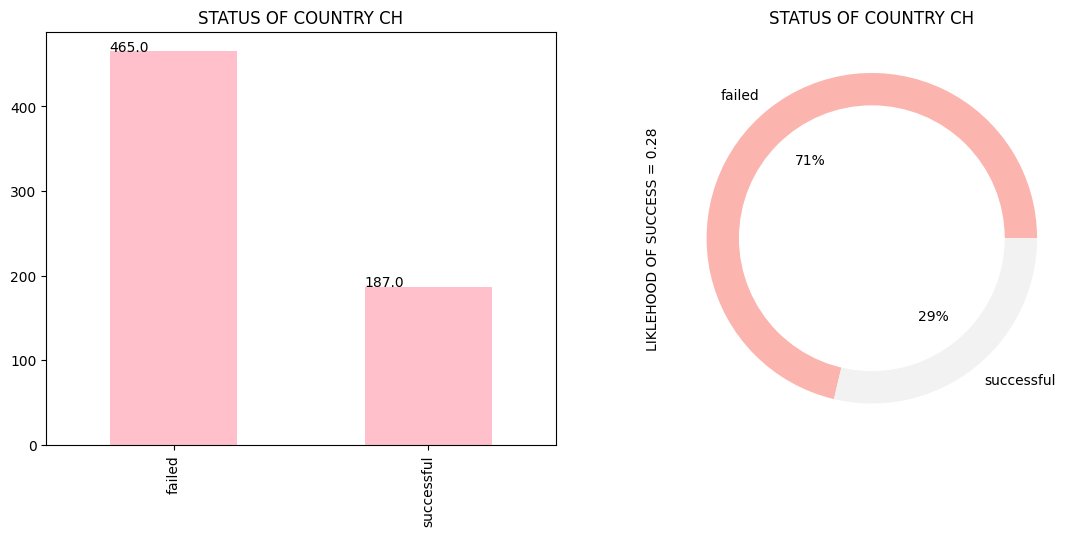

<Figure size 640x480 with 0 Axes>

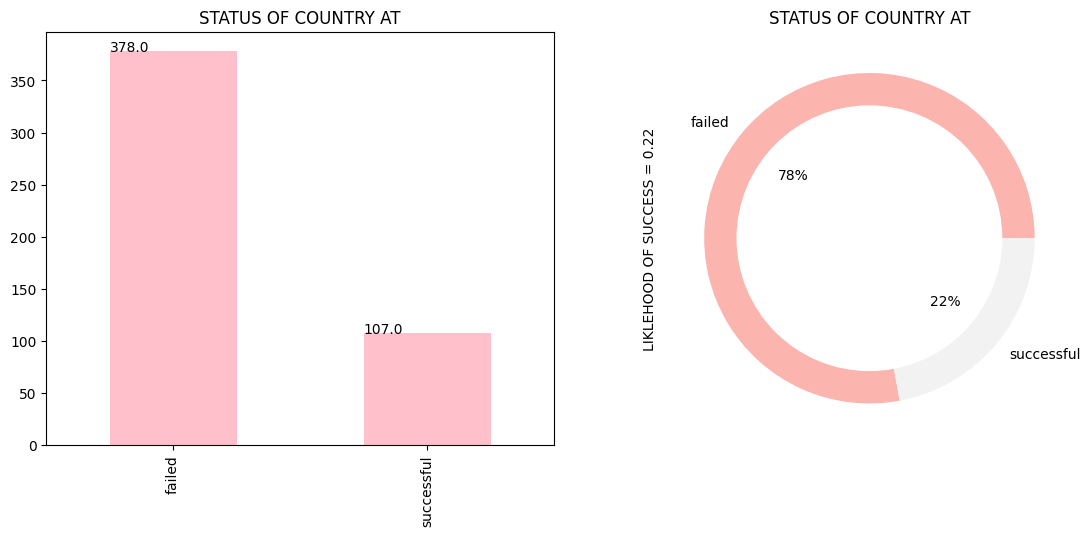

<Figure size 640x480 with 0 Axes>

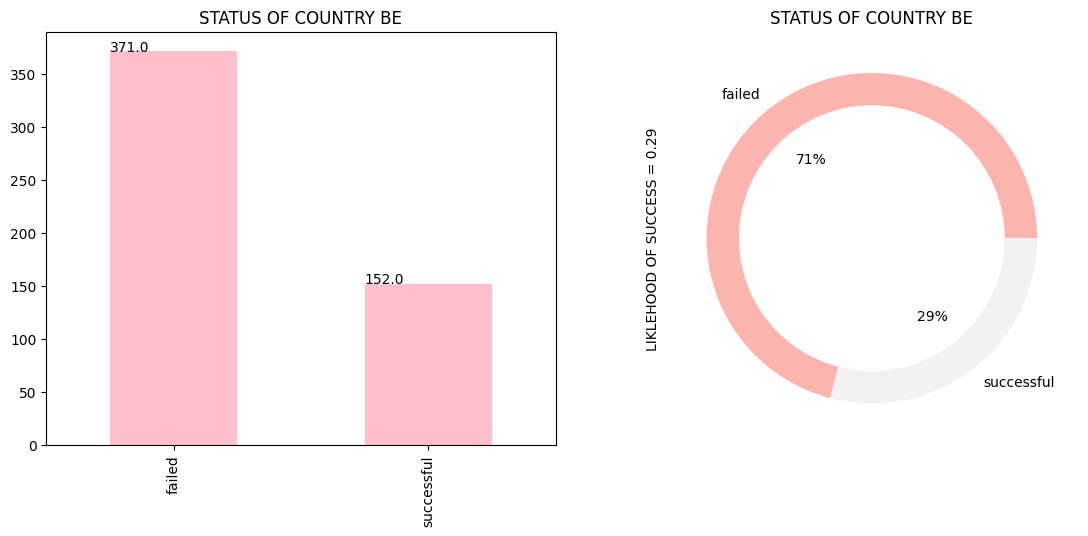

<Figure size 640x480 with 0 Axes>

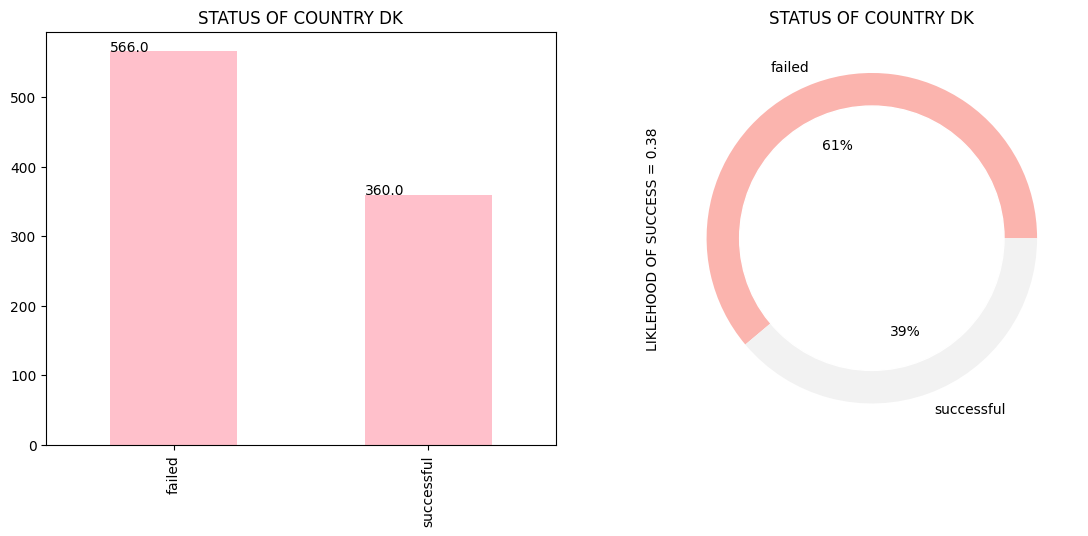

<Figure size 640x480 with 0 Axes>

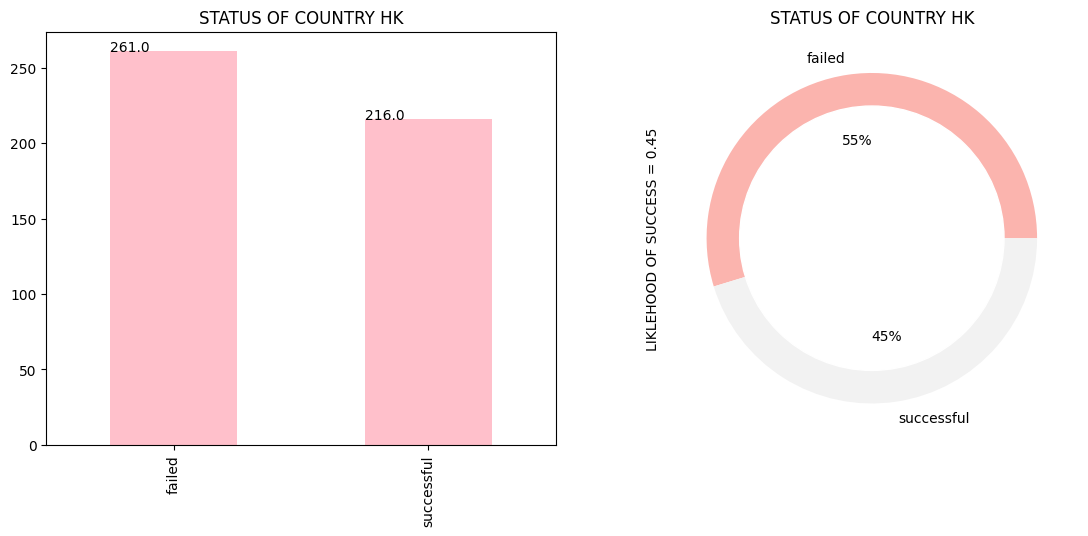

<Figure size 640x480 with 0 Axes>

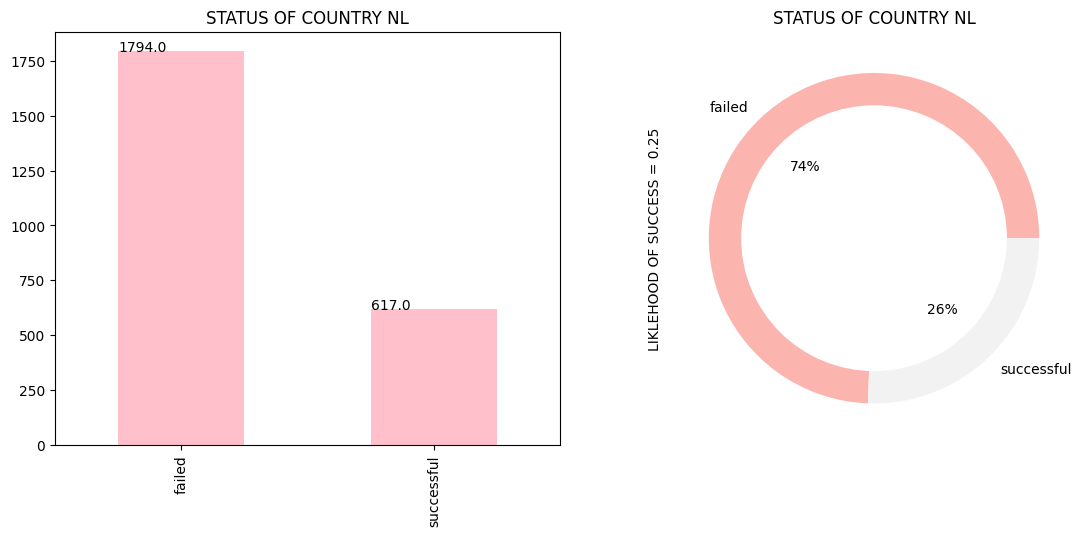

<Figure size 640x480 with 0 Axes>

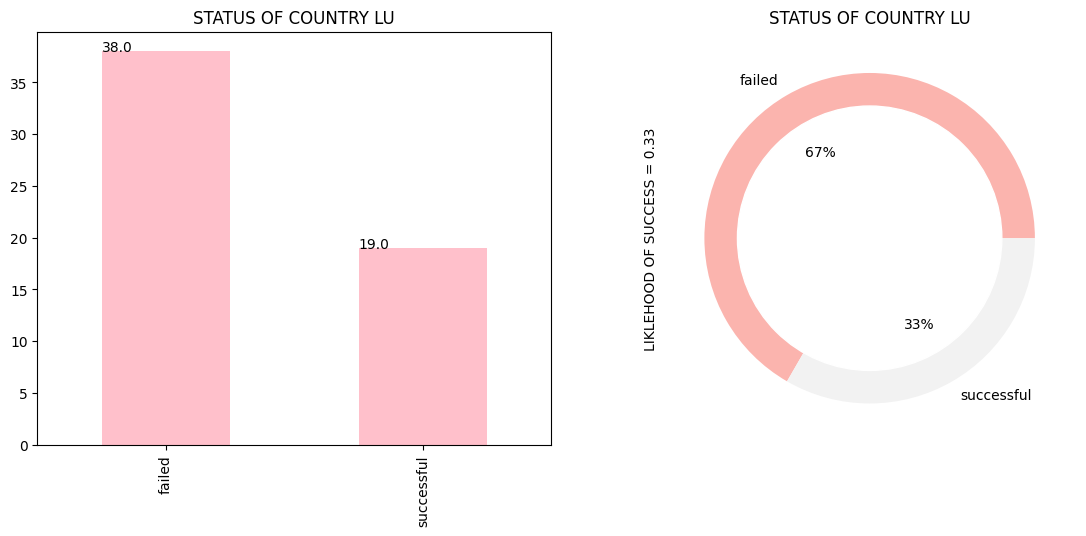

<Figure size 640x480 with 0 Axes>

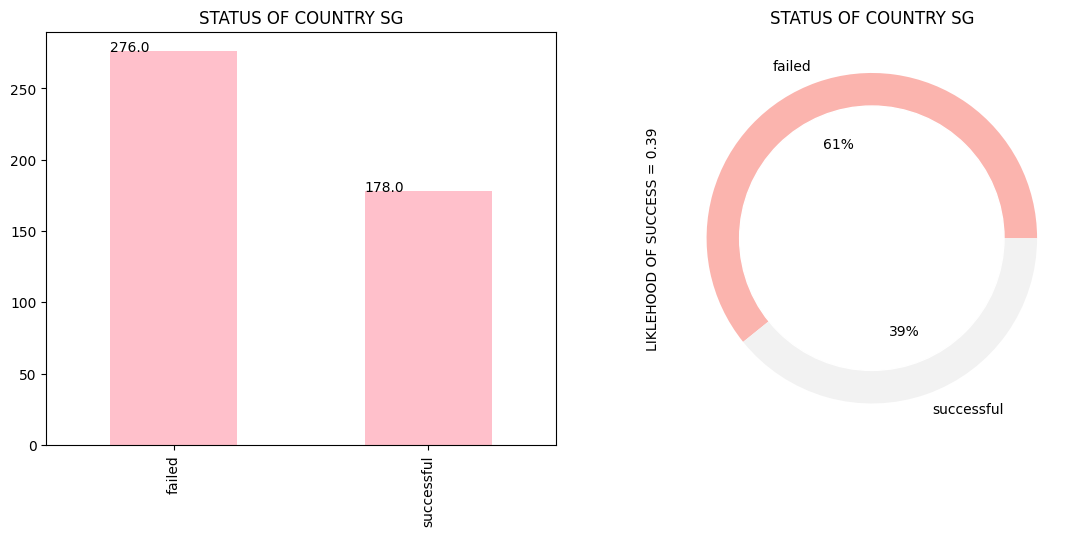

<Figure size 640x480 with 0 Axes>

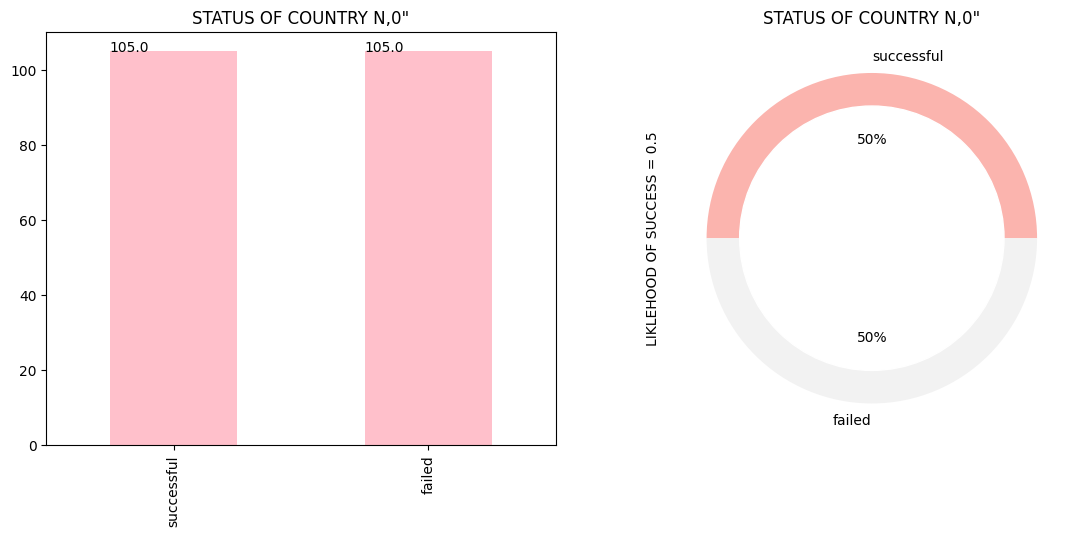

<Figure size 640x480 with 0 Axes>

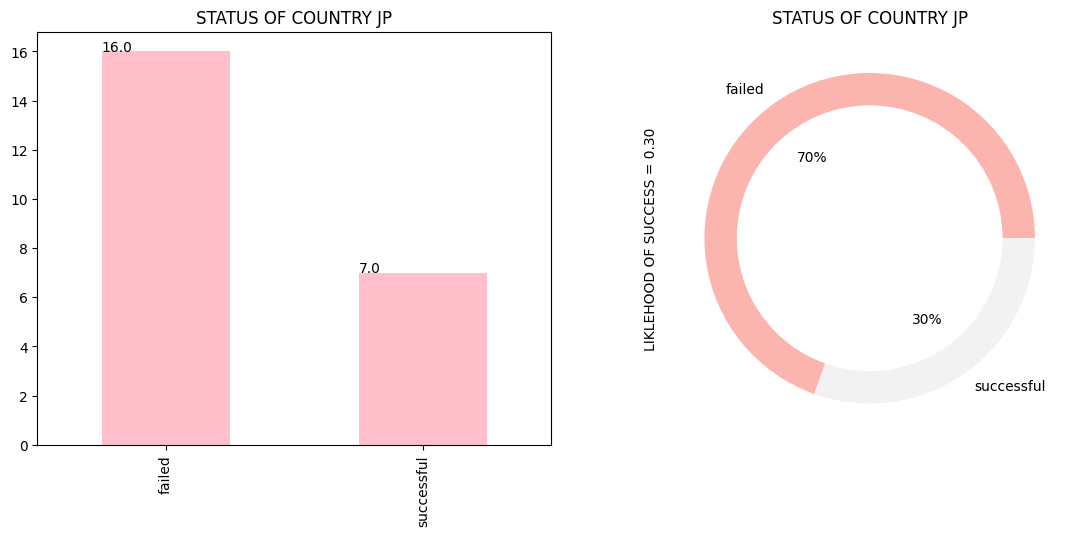

<Figure size 640x480 with 0 Axes>

In [22]:

options = ['successful', 'failed']
sample = df[df['state'].isin(options)]
cats = sample['country'].unique()

# Create the folder to save the plots
os.makedirs("plots3", exist_ok=True)

for cat in cats:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot - Bar chart
    x = sample[sample['country'] == cat]
    data = x['state'].value_counts()
    ax[0].set_title("STATUS OF COUNTRY {}".format(cat.upper()))
    data.plot(kind="bar", color='pink', ax=ax[0])

    for p in ax[0].patches:
        ax[0].annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()))

    # Second subplot - Pie chart
    ax[1].set_title("STATUS OF COUNTRY {}".format(cat.upper()))
    data.plot(kind='pie', ax=ax[1], cmap='Pastel1', autopct='%1.0f%%')
    my_circle = plt.Circle((0, 0), .8, color='white')
    ax[1].add_artist(my_circle)
    success_ratio = str((data.successful) / (data.values.sum()))
    success_ratio = "LIKLEHOOD OF SUCCESS = " + success_ratio[0:4]
    ax[1].set_ylabel(success_ratio, fontdict={'fontweight': 12})

    plt.tight_layout(pad=3)

    # Save the plot in the "plots3" folder
    plt.savefig(f"plots3/{cat}_plot.png")
    plt.figure()
    plt.show()
    plt.close()


con_var.remove("ID")

#### **AVERAGE NUMBER OF BACKERS PER CATEGORY**

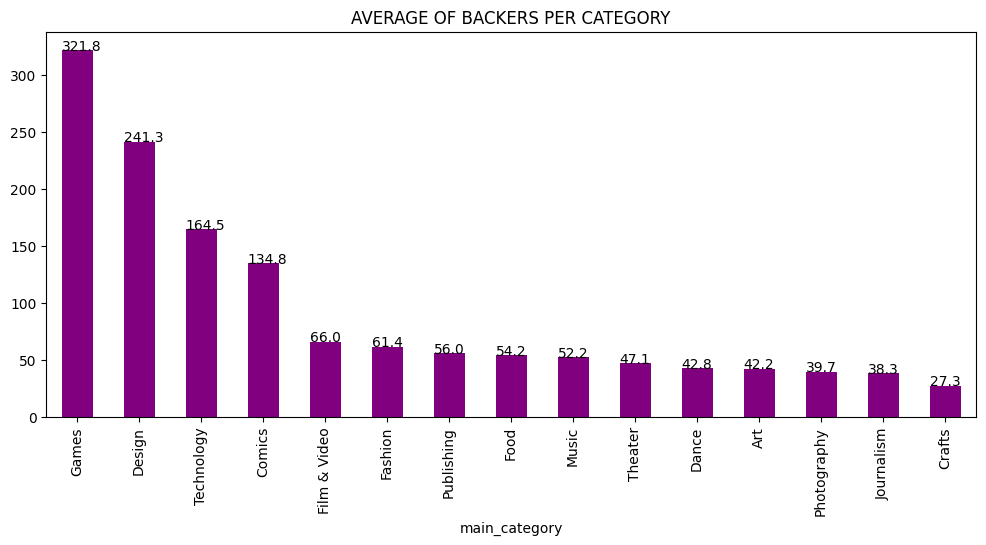

In [23]:
# Set Figure Size
plt.figure(figsize=(12,5))

# Plot the bargraph
ax = df.groupby(['main_category'])['backers'].mean().sort_values(ascending=False).plot(kind='bar',color='purple')
ax.set_title("AVERAGE OF BACKERS PER CATEGORY")

# Plot the labels on top of bars
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))

plt.show()

#### **AVERAGE GOAL with reference to CATEGORY VS AVERAGE PLEADGED with reference to CATEGORY**

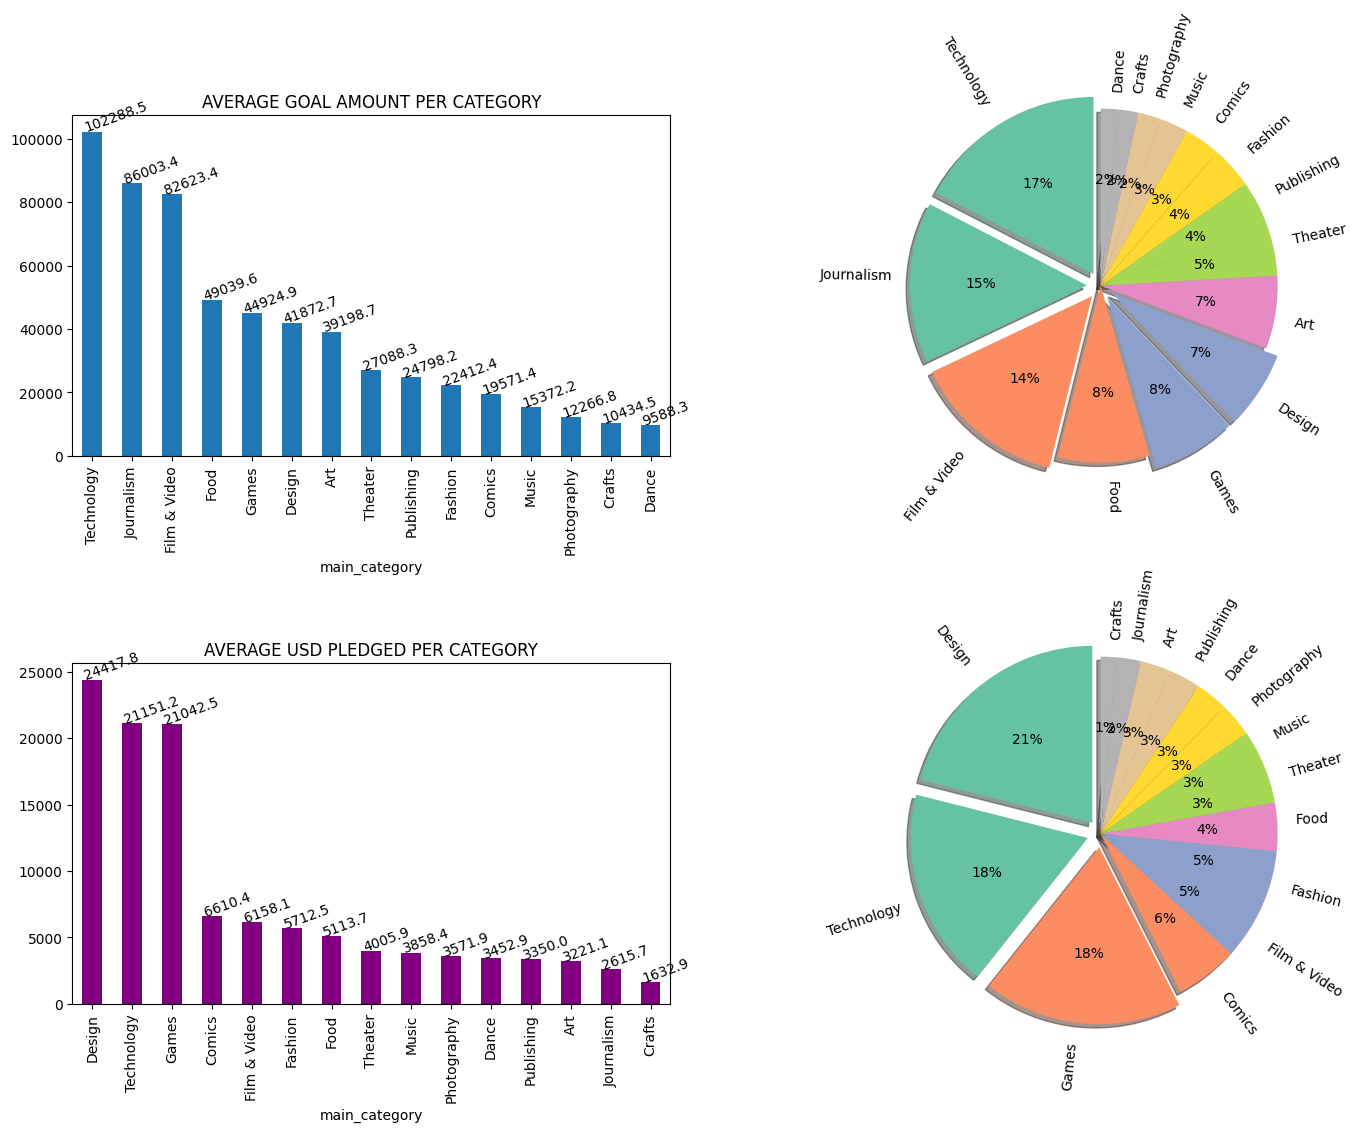

In [24]:
# MEDIAN USD PLEDGED PER CATEGORY
fig,axes = plt.subplots(2,2,figsize=(15,12))

# AXIS-1 GOAL
data = df.groupby(['main_category'])['usd_goal_real'].mean().sort_values(ascending=False)
ax = data.plot(kind='bar',ax=axes[0,0])
ax.set_title("AVERAGE GOAL AMOUNT PER CATEGORY")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),rotation=20)

data.plot(kind='pie',startangle=90,ax=axes[0,1],cmap='Set2',radius=1.3,rotatelabels=45, autopct='%1.0f%%',explode=(0.1,0.1,0.1,0,0.1,0.1,0,0,0,0,0,0,0,0,0),shadow=True)
axes[0,1].set_ylabel("")

# AXIS-2 PLEDGED
data = df.groupby(['main_category'])['usd_pledged_real'].mean().sort_values(ascending=False)
ax = data.plot(kind='bar',ax=axes[1,0],color='purple')

axes[1,0].set_title("AVERAGE USD PLEDGED PER CATEGORY")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),rotation=20)

data.plot(kind='pie',startangle=90,ax=axes[1,1],cmap='Set2',radius=1.3,rotatelabels=45, autopct='%1.0f%%',explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0),shadow=True)
axes[1,1].set_ylabel("")

plt.tight_layout(pad=3)
plt.show()

### Save plots zip files


In [25]:

shutil.make_archive('/content/plots1', 'zip', '/content/plots1')

shutil.make_archive('/content/plots2', 'zip', '/content/plots2')

shutil.make_archive('/content/plots3', 'zip', '/content/plots3')


'/content/plots3.zip'

## **Creating And Visualizing Features**

#### **Create The Date Time As Features**

In [26]:
def filter_date(df,feature):
    global day_list,month_list,year_list,hour_list,min_list
    day_list = []
    month_list = []
    year_list = []
    hour_list = []
    min_list = []


    for data in df[feature]:
        if feature == 'deadline':
            data = data.split(" ")
            # Date Data
            date_data = data[0].split("-")
            # Storing data in list
            day_list.append(date_data[2])
            month_list.append(date_data[1])
            year_list.append(date_data[0])
        else:
            data = data.split(" ")
            # Date Data
            date_data = data[0].split("-")
            # Storing data in list
            day_list.append(date_data[2])
            month_list.append(date_data[1])
            year_list.append(date_data[0])
            # Time Data
            time_data = data[1].split(":")
            # Storing Time Data
            hour_list.append(time_data[0])
            min_list.append(time_data[1])

In [27]:
filter_date(df,'deadline')

In [28]:
df['deadline_day'] = [int(x) for x in day_list]     # Converting to int and storing it
df['deadline_month'] = [int(x) for x in month_list] # Converting to int and storing it
df['deadline_year'] = [int(x) for x in year_list]   # Converting to int and storing it

In [29]:
filter_date(df,'launched')

In [30]:
df['launched_day'] = [int(x) for x in day_list]     # Converting to int and storing it
df['launched_month'] = [int(x) for x in month_list] # Converting to int and storing it
df['launched_year'] = [int(x) for x in year_list]   # Converting to int and storing it

df['launched_hour'] = [int(x) for x in hour_list]     # Converting to int and storing it
df['launched_min'] = [int(x) for x in min_list] # Converting to int and storing it

In [31]:
df.drop(columns=['deadline','launched','ID'],axis=1,inplace=True)

#### **Create Dummy Variables For Currency**

In [32]:
dummy = pd.get_dummies(df['currency'],drop_first=False)

In [33]:
dummy

AUD  CAD  CHF  DKK  EUR  GBP  HKD  JPY  MXN  NOK  NZD  SEK  SGD  USD
0         0    0    0    0    0    1    0    0    0    0    0    0    0    0
1         0    0    0    0    0    0    0    0    0    0    0    0    0    1
2         0    0    0    0    0    0    0    0    0    0    0    0    0    1
3         0    0    0    0    0    0    0    0    0    0    0    0    0    1
4         0    0    0    0    0    0    0    0    0    0    0    0    0    1
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
378656    0    0    0    0    0    0    0    0    0    0    0    0    0    1
378657    0    0    0    0    0    0    0    0    0    0    0    0    0    1
378658    0    0    0    0    0    0    0    0    0    0    0    0    0    1
378659    0    0    0    0    0    0    0    0    0    0    0    0    0    1
378660    0    0    0    0    0    0    0    0    0    0    0    0    0    1

[378657 rows x 14 columns]

In [34]:
df = pd.concat([df,dummy],axis=1,join='inner')

In [35]:
del df['currency']

#### **TOTAL USD PLEADGED ANNUALLY**

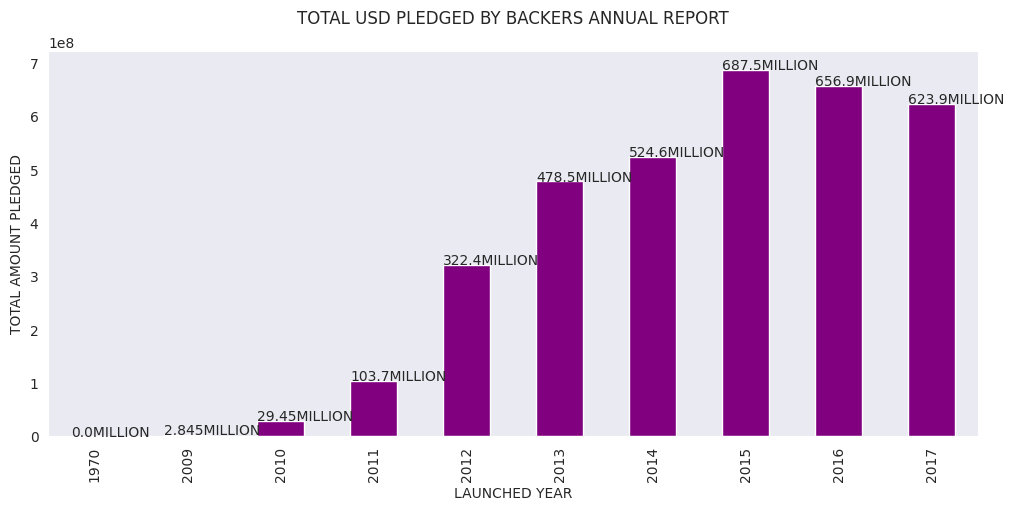

In [36]:
sns.set_style("dark")
plt.figure(figsize=(12,5))
plt.title("TOTAL USD PLEDGED BY BACKERS ANNUAL REPORT",pad=20)
data = df.drop(df[df['launched_year']==2018].index,inplace=False,axis=0)
data = data.groupby("launched_year")['usd_pledged_real'].sum()
ax = data.plot(kind='bar',color='purple')

ax.set_xlabel("LAUNCHED YEAR")
ax.set_ylabel("TOTAL AMOUNT PLEDGED")

for p in ax.patches:
    height = str(p.get_height()/1000000)[:5] + "MILLION"
    ax.annotate("{}".format(height),(p.get_x(),p.get_height()))

plt.show()

* As we can see from the plot we have very less pleadged for year 1970

In [37]:
df[df['launched_year']==1970]  # CLEARNIG DATA WITH A WRONG ENTRY

name      category  \
2842       Salt of the Earth: A Dead Sea Movie (Canceled)  Film & Video   
48147   1st Super-Size Painting - Social Network Owned...           Art   
75397                                 "ICHOR"  (Canceled)  Film & Video   
94579   Support Solo Theater! Help "Ungrateful Daughte...       Theater   
247913  Help RIZ Make A Charity Album: 8 Songs, 8 Caus...         Music   
273779     Identity Communications Infographic (Canceled)        Design   
319002                       Student Auditions Music 2015    Publishing   

       main_category     goal  pledged      state  backers country  \
2842    Film & Video   5000.0      0.0   canceled        0      US   
48147            Art  15000.0      0.0   canceled        0      US   
75397   Film & Video    700.0      0.0   canceled        0      US   
94579        Theater   4000.0      0.0   canceled        0      US   
247913         Music  10000.0      0.0   canceled        0      US   
273779        Design    500.0      0.0   canceled        0      US   
319002    Publishing   1900.0      0.0  suspended        0      CH   

        usd pledged  usd_pledged_real  ...  EUR  GBP  HKD  JPY  MXN  NOK  NZD  \
2842            0.0               0.0  ...    0    0    0    0    0    0    0   
48147           0.0               0.0  ...    0    0    0    0    0    0    0   
75397           0.0               0.0  ...    0    0    0    0    0    0    0   
94579           0.0               0.0  ...    0    0    0    0    0    0    0   
247913          0.0               0.0  ...    0    0    0    0    0    0    0   
273779          0.0               0.0  ...    0    0    0    0    0    0    0   
319002          0.0               0.0  ...    0    0    0    0    0    0    0   

        SEK  SGD  USD  
2842      0    0    1  
48147     0    0    1  
75397     0    0    1  
94579     0    0    1  
247913    0    0    1  
273779    0    0    1  
319002    0    0    0  

[7 rows x 33 columns]

* As we have only 7 records let's drop it to keep it out of our analysis

In [38]:
df.drop(df[df['launched_year']==1970].index,axis=0,inplace=True)

In [39]:
def annual_category_visualization(df):
    years = sorted(df['launched_year'].unique())[:-1]
    fig,axes = plt.subplots(9,2,figsize=(15,65))

    row = 0
    for year in years:
        data = df[df['launched_year']==year]

        # PIE CHART
        pie = data['main_category'].value_counts()
        axes[row,0].set_title("TOTAL NUMBER OF CATEGORIES IN {}".format(str(year)))
        axes[row,0].set_xlabel(" ")
        pie.plot(kind='pie',ax=axes[row,0],autopct='%1.0f%%',cmap='Set2',explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0),shadow=True)

        # barchart
        bar = data.groupby("main_category")['usd_pledged_real'].sum().plot(kind='bar',ax=axes[row,1],color='purple')
        total = "Gross USD PLEDGED "+ str(data['usd_pledged_real'].sum() / 1000000)[:5] + " Million $"
        axes[row,1].set_ylabel("TOTAL AMOUNT PLEDGED PER CATEGORIES IN {}".format(str(year)))
        axes[row,1].set_title(total,pad=20)
        axes[row,1].set_yticklabels('')
        axes[row,1].set_xlabel(" ")

        for p in bar.patches:
            height = str(p.get_height()/1000000)[:4] + "Million $"
            bar.annotate("{}".format(height),(p.get_x(),p.get_height()+10000),rotation=45)

        row+=1

    plt.tight_layout(pad=3)
    plt.show()

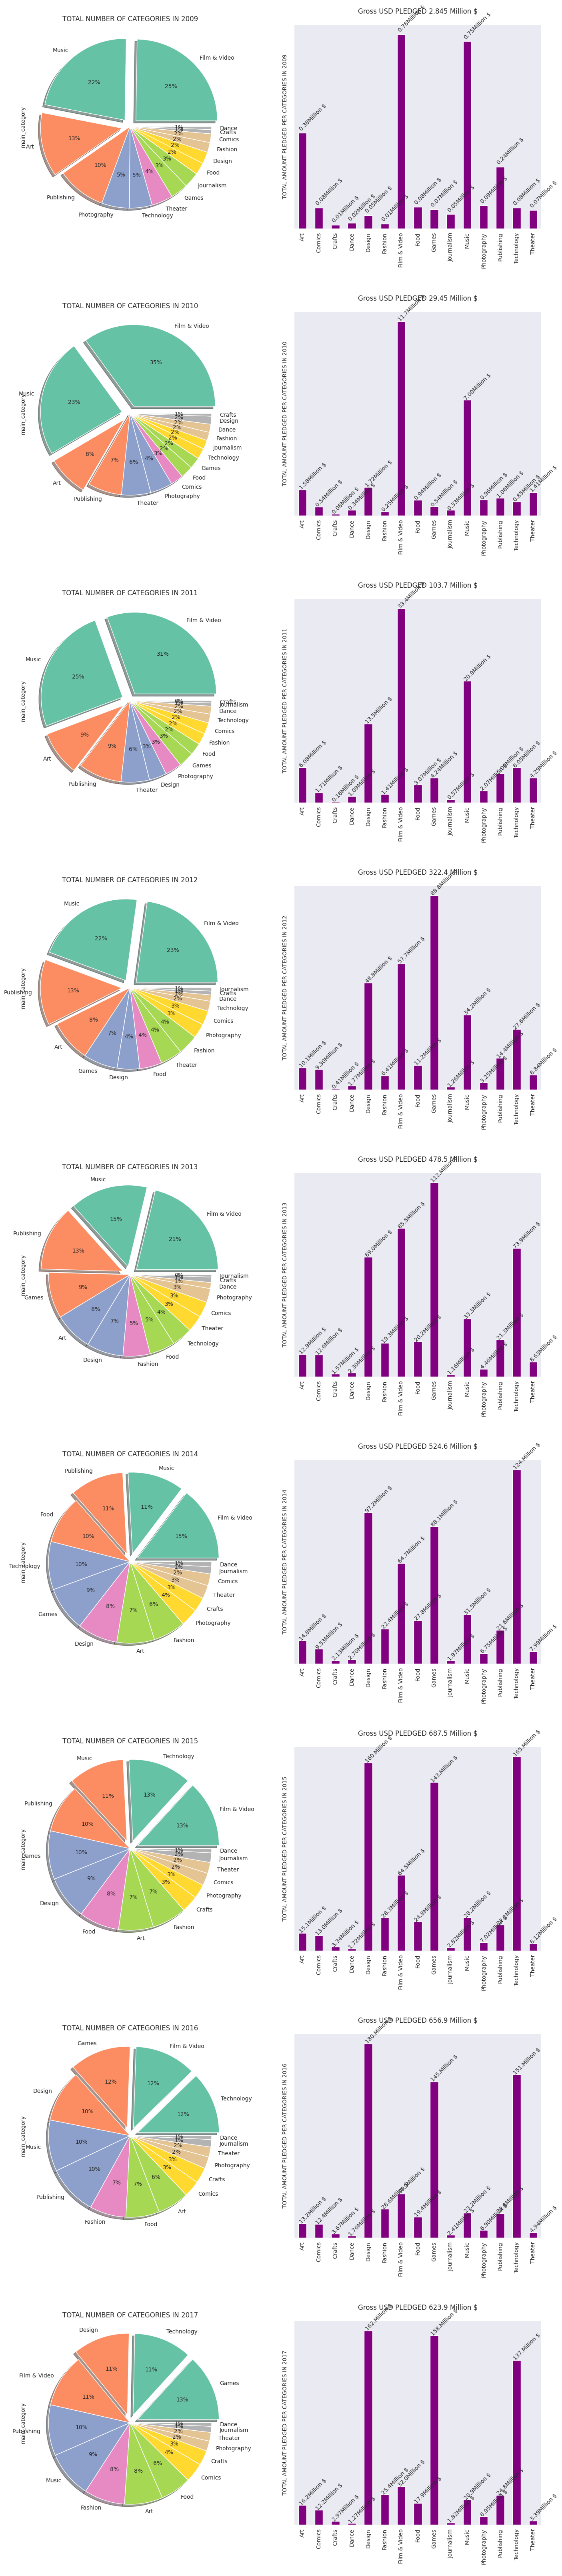

In [40]:
annual_category_visualization(df)

#### **Encoding The Target Variable State**

In [41]:
mapp = {"successful":1,'failed':0}

df['state'] = df['state'].map(mapp)

In [ ]:
# Dropping NAN state not(successful/failed':0)
df = df[df['state'].notna()]

In [42]:
years = df.groupby("launched_year").mean()['state'].index
values = df.groupby("launched_year").mean()['state'].values

In [43]:
# Number Of Fundraisers data
number_of_fundraisers = []
for year in years:
    x = df[df['launched_year']==year]
    number_of_fundraisers.append(len(x))

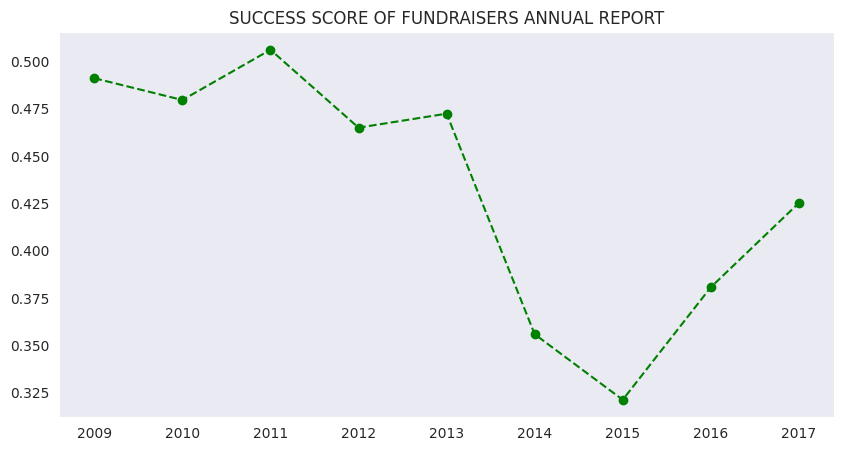

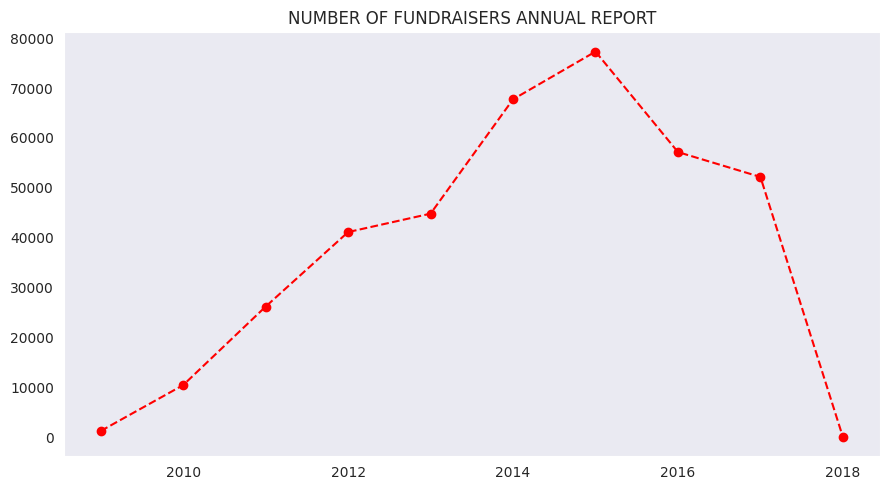

In [44]:
# SUBPLOT - 1
plt.figure(figsize=(10,5))
plt.title("SUCCESS SCORE OF FUNDRAISERS ANNUAL REPORT")
val = list(df.groupby("launched_year").mean()['state'].values)
plt.plot(years,val,linestyle='dashed',marker='o',color='g')

# SUBPLOT - 2
plt.figure(figsize=(9,5))
plt.title("NUMBER OF FUNDRAISERS ANNUAL REPORT")
plt.plot(years,number_of_fundraisers,linestyle='dashed',marker='o',color='r')

plt.tight_layout()
plt.show()

* As we can see a simple yet intresting visualization where it shows that kickstarter had increased the number of fundraisers on their platform, but this resulted in decreasing success score(which was very crutial for kickstarter to make money) hence they decreased the number of fundraisers after 2015 and there was indeed an increase in success rate

### **Balancing Dataset**

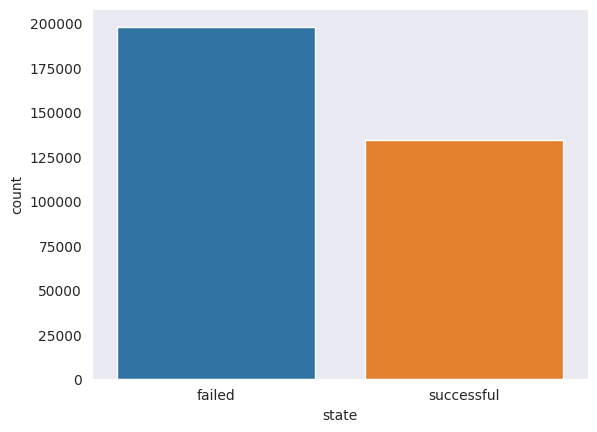

In [45]:

sns.set_style("dark")
ax = sns.countplot(x='state', data=df)
ax.set_xticklabels(['failed', 'successful'])

plt.show()

In [46]:
df['state'].value_counts()

0.0    197716
1.0    133956
Name: state, dtype: int64

In [47]:
from sklearn.utils import resample
df_major = df[df['state'] == 0]  # Select the major class
df_minor = df[df['state'] == 1]  # Select the minor class

df_major_upsampled = resample(df_major, replace=True, n_samples=350000, random_state=23)
df_minor_upsampled = resample(df_minor, replace=True, n_samples=350000, random_state=23)

df = pd.concat([df_major_upsampled, df_minor_upsampled])


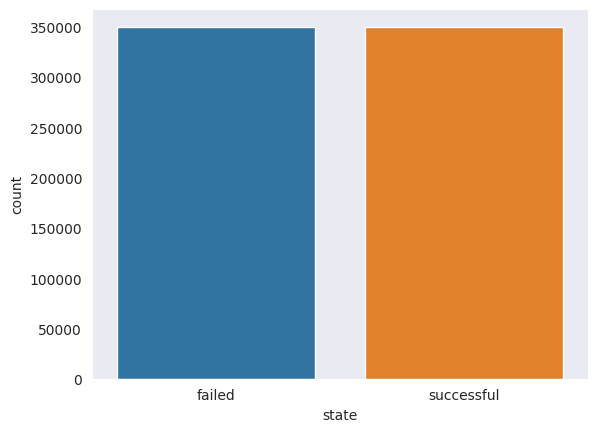

In [48]:

sns.set_style("dark")
ax = sns.countplot(x='state', data=df)
ax.set_xticklabels(['failed', 'successful'])

plt.show()

In [49]:
df['state'].value_counts()

0.0    350000
1.0    350000
Name: state, dtype: int64

### **Encoding Country, Main Category and Name**

In [50]:
df = df.reset_index(drop=True).copy()

In [51]:
dummy = pd.get_dummies(df[['main_category','country','category']],drop_first=False)

In [52]:
dummy

main_category_Art  main_category_Comics  main_category_Crafts  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       1                     0                     0   
4                       0                     0                     0   
...                   ...                   ...                   ...   
699995                  1                     0                     0   
699996                  0                     0                     0   
699997                  0                     0                     0   
699998                  0                     0                     0   
699999                  1                     0                     0   

        main_category_Dance  main_category_Design  main_category_Fashion  \
0                         0                     0                      0   
1                         0                     0                      0   
2                         0                     0                      1   
3                         0                     0                      0   
4                         1                     0                      0   
...                     ...                   ...                    ...   
699995                    0                     0                      0   
699996                    0                     0                      0   
699997                    0                     1                      0   
699998                    0                     0                      0   
699999                    0                     0                      0   

        main_category_Film & Video  main_category_Food  main_category_Games  \
0                                0                   0                    0   
1                                0                   0                    0   
2                                0                   0                    0   
3                                0                   0                    0   
4                                0                   0                    0   
...                            ...                 ...                  ...   
699995                           0                   0                    0   
699996                           0                   0                    0   
699997                           0                   0                    0   
699998                           0                   0                    0   
699999                           0                   0                    0   

        main_category_Journalism  ...  category_Wearables  category_Weaving  \
0                              0  ...                   0                 0   
1                              0  ...                   0                 0   
2                              0  ...                   0                 0   
3                              0  ...                   0                 0   
4                              0  ...                   0                 0   
...                          ...  ...                 ...               ...   
699995                         0  ...                   0                 0   
699996                         0  ...                   0                 0   
699997                         0  ...                   0                 0   
699998                         0  ...                   0                 0   
699999                         0  ...                   0                 0   

        category_Web  category_Webcomics  category_Webseries  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   
3                  0                   0                   0   


In [53]:
df = pd.concat([df,dummy],axis=1,join='inner')

In [54]:
df.drop(columns=['main_category','country','category','deadline_day','deadline_month','name'],axis=1,inplace=True)

## **Feature Selection**

In [55]:
df.drop(columns=['deadline_year','usd pledged','usd_pledged_real','backers'],inplace=True,axis=1)

In [56]:
df

goal   pledged  state  usd_goal_real  launched_day  launched_month  \
0        7000.0      11.0    0.0        8944.77             7               4   
1        7500.0     176.0    0.0        7500.00            22               2   
2        2000.0     505.0    0.0        2000.00            24               5   
3       15000.0      50.0    0.0       15000.00            16               9   
4       25000.0       0.0    0.0       25000.00            14               3   
...         ...       ...    ...            ...           ...             ...   
699995    800.0     830.0    1.0         126.23            25              11   
699996  20000.0  300340.0    1.0       20000.00            10               4   
699997   4500.0    4515.0    1.0        4500.00            25               1   
699998   1250.0    1295.0    1.0        1250.00            19               2   
699999    795.0     931.0    1.0         795.00             1               7   

        launched_year  launched_hour  launched_min  AUD  ...  \
0                2017             15             3    0  ...   
1                2011              5            18    0  ...   
2                2015             15            31    0  ...   
3                2013             19            42    0  ...   
4                2016             22            33    0  ...   
...               ...            ...           ...  ...  ...   
699995           2017             22            16    0  ...   
699996           2017             15            38    0  ...   
699997           2012             14            15    0  ...   
699998           2014              1            18    0  ...   
699999           2010              5             6    0  ...   

        category_Wearables  category_Weaving  category_Web  \
0                        0                 0             0   
1                        0                 0             0   
2                        0                 0             0   
3                        0                 0             0   
4                        0                 0             0   
...                    ...               ...           ...   
699995                   0                 0             0   
699996                   0                 0             0   
699997                   0                 0             0   
699998                   0                 0             0   
699999                   0                 0             0   

        category_Webcomics  category_Webseries  category_Woodworking  \
0                        0                   0                     0   
1                        0                   0                     0   
2                        0                   0                     0   
3                        0                   0                     0   
4                        0                   0                     0   
...                    ...                 ...                   ...   
699995                   0                   0                     0   
699996                   0                   0                     0   
699997                   0                   0                     0   
699998                   0                   0                     0   
699999                   0                   0                     0   

        category_Workshops  category_World Music  category_Young Adult  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
699995                   0                     0                     0   
699996                   0                     0                   

### **Creating Training & Validation Data**

In [57]:
df.isnull().sum()


goal                    0
pledged                 0
state                   0
usd_goal_real           0
launched_day            0
                       ..
category_Woodworking    0
category_Workshops      0
category_World Music    0
category_Young Adult    0
category_Zines          0
Length: 220, dtype: int64

In [58]:
df

goal   pledged  state  usd_goal_real  launched_day  launched_month  \
0        7000.0      11.0    0.0        8944.77             7               4   
1        7500.0     176.0    0.0        7500.00            22               2   
2        2000.0     505.0    0.0        2000.00            24               5   
3       15000.0      50.0    0.0       15000.00            16               9   
4       25000.0       0.0    0.0       25000.00            14               3   
...         ...       ...    ...            ...           ...             ...   
699995    800.0     830.0    1.0         126.23            25              11   
699996  20000.0  300340.0    1.0       20000.00            10               4   
699997   4500.0    4515.0    1.0        4500.00            25               1   
699998   1250.0    1295.0    1.0        1250.00            19               2   
699999    795.0     931.0    1.0         795.00             1               7   

        launched_year  launched_hour  launched_min  AUD  ...  \
0                2017             15             3    0  ...   
1                2011              5            18    0  ...   
2                2015             15            31    0  ...   
3                2013             19            42    0  ...   
4                2016             22            33    0  ...   
...               ...            ...           ...  ...  ...   
699995           2017             22            16    0  ...   
699996           2017             15            38    0  ...   
699997           2012             14            15    0  ...   
699998           2014              1            18    0  ...   
699999           2010              5             6    0  ...   

        category_Wearables  category_Weaving  category_Web  \
0                        0                 0             0   
1                        0                 0             0   
2                        0                 0             0   
3                        0                 0             0   
4                        0                 0             0   
...                    ...               ...           ...   
699995                   0                 0             0   
699996                   0                 0             0   
699997                   0                 0             0   
699998                   0                 0             0   
699999                   0                 0             0   

        category_Webcomics  category_Webseries  category_Woodworking  \
0                        0                   0                     0   
1                        0                   0                     0   
2                        0                   0                     0   
3                        0                   0                     0   
4                        0                   0                     0   
...                    ...                 ...                   ...   
699995                   0                   0                     0   
699996                   0                   0                     0   
699997                   0                   0                     0   
699998                   0                   0                     0   
699999                   0                   0                     0   

        category_Workshops  category_World Music  category_Young Adult  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
699995                   0                     0                     0   
699996                   0                     0                   

In [59]:
Y = df['state']
X = df.drop(columns=['state'],axis=1,inplace=False)

In [60]:
X

goal   pledged  usd_goal_real  launched_day  launched_month  \
0        7000.0      11.0        8944.77             7               4   
1        7500.0     176.0        7500.00            22               2   
2        2000.0     505.0        2000.00            24               5   
3       15000.0      50.0       15000.00            16               9   
4       25000.0       0.0       25000.00            14               3   
...         ...       ...            ...           ...             ...   
699995    800.0     830.0         126.23            25              11   
699996  20000.0  300340.0       20000.00            10               4   
699997   4500.0    4515.0        4500.00            25               1   
699998   1250.0    1295.0        1250.00            19               2   
699999    795.0     931.0         795.00             1               7   

        launched_year  launched_hour  launched_min  AUD  CAD  ...  \
0                2017             15             3    0    0  ...   
1                2011              5            18    0    0  ...   
2                2015             15            31    0    0  ...   
3                2013             19            42    0    0  ...   
4                2016             22            33    0    0  ...   
...               ...            ...           ...  ...  ...  ...   
699995           2017             22            16    0    0  ...   
699996           2017             15            38    0    0  ...   
699997           2012             14            15    0    0  ...   
699998           2014              1            18    0    0  ...   
699999           2010              5             6    0    0  ...   

        category_Wearables  category_Weaving  category_Web  \
0                        0                 0             0   
1                        0                 0             0   
2                        0                 0             0   
3                        0                 0             0   
4                        0                 0             0   
...                    ...               ...           ...   
699995                   0                 0             0   
699996                   0                 0             0   
699997                   0                 0             0   
699998                   0                 0             0   
699999                   0                 0             0   

        category_Webcomics  category_Webseries  category_Woodworking  \
0                        0                   0                     0   
1                        0                   0                     0   
2                        0                   0                     0   
3                        0                   0                     0   
4                        0                   0                     0   
...                    ...                 ...                   ...   
699995                   0                   0                     0   
699996                   0                   0                     0   
699997                   0                   0                     0   
699998                   0                   0                     0   
699999                   0                   0                     0   

        category_Workshops  category_World Music  category_Young Adult  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
699995                   0                     0                     0   
699996                   0                     0                     0   
699997           

### **Train Test Split**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.80,random_state=4)

In [63]:
X

goal   pledged  usd_goal_real  launched_day  launched_month  \
0        7000.0      11.0        8944.77             7               4   
1        7500.0     176.0        7500.00            22               2   
2        2000.0     505.0        2000.00            24               5   
3       15000.0      50.0       15000.00            16               9   
4       25000.0       0.0       25000.00            14               3   
...         ...       ...            ...           ...             ...   
699995    800.0     830.0         126.23            25              11   
699996  20000.0  300340.0       20000.00            10               4   
699997   4500.0    4515.0        4500.00            25               1   
699998   1250.0    1295.0        1250.00            19               2   
699999    795.0     931.0         795.00             1               7   

        launched_year  launched_hour  launched_min  AUD  CAD  ...  \
0                2017             15             3    0    0  ...   
1                2011              5            18    0    0  ...   
2                2015             15            31    0    0  ...   
3                2013             19            42    0    0  ...   
4                2016             22            33    0    0  ...   
...               ...            ...           ...  ...  ...  ...   
699995           2017             22            16    0    0  ...   
699996           2017             15            38    0    0  ...   
699997           2012             14            15    0    0  ...   
699998           2014              1            18    0    0  ...   
699999           2010              5             6    0    0  ...   

        category_Wearables  category_Weaving  category_Web  \
0                        0                 0             0   
1                        0                 0             0   
2                        0                 0             0   
3                        0                 0             0   
4                        0                 0             0   
...                    ...               ...           ...   
699995                   0                 0             0   
699996                   0                 0             0   
699997                   0                 0             0   
699998                   0                 0             0   
699999                   0                 0             0   

        category_Webcomics  category_Webseries  category_Woodworking  \
0                        0                   0                     0   
1                        0                   0                     0   
2                        0                   0                     0   
3                        0                   0                     0   
4                        0                   0                     0   
...                    ...                 ...                   ...   
699995                   0                   0                     0   
699996                   0                   0                     0   
699997                   0                   0                     0   
699998                   0                   0                     0   
699999                   0                   0                     0   

        category_Workshops  category_World Music  category_Young Adult  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
699995                   0                     0                     0   
699996                   0                     0                     0   
699997           

In [64]:

headers = X.columns.tolist()
headers

['goal',
 'pledged',
 'usd_goal_real',
 'launched_day',
 'launched_month',
 'launched_year',
 'launched_hour',
 'launched_min',
 'AUD',
 'CAD',
 'CHF',
 'DKK',
 'EUR',
 'GBP',
 'HKD',
 'JPY',
 'MXN',
 'NOK',
 'NZD',
 'SEK',
 'SGD',
 'USD',
 'main_category_Art',
 'main_category_Comics',
 'main_category_Crafts',
 'main_category_Dance',
 'main_category_Design',
 'main_category_Fashion',
 'main_category_Film & Video',
 'main_category_Food',
 'main_category_Games',
 'main_category_Journalism',
 'main_category_Music',
 'main_category_Photography',
 'main_category_Publishing',
 'main_category_Technology',
 'main_category_Theater',
 'country_AT',
 'country_AU',
 'country_BE',
 'country_CA',
 'country_CH',
 'country_DE',
 'country_DK',
 'country_ES',
 'country_FR',
 'country_GB',
 'country_HK',
 'country_IE',
 'country_IT',
 'country_JP',
 'country_LU',
 'country_MX',
 'country_N,0"',
 'country_NL',
 'country_NO',
 'country_NZ',
 'country_SE',
 'country_SG',
 'country_US',
 'category_3D Printin

In [65]:


# Create an empty DataFrame with only headers
headers_df = pd.DataFrame(columns=headers)

# Save only the headers to the CSV file
headers_df.to_csv('headers.csv')

## **Modelling**

### GaussianNB

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred_gnb).sum()))
print('Accuracy of Naive Bayes classifier on train set:' , gnb.score(X_train, Y_train))
print('Accuracy of Naive Bayes classifier on test set:' , gnb.score(X_test, Y_test))
print(' Naive Bayes\n',
      classification_report(Y_test, y_pred_gnb, target_names = ['not 1', '1']))

Number of mislabeled points out of a total 140000 points : 64852
Accuracy of Naive Bayes classifier on train set: 0.5374535714285714
Accuracy of Naive Bayes classifier on test set: 0.5367714285714286
 Naive Bayes
               precision    recall  f1-score   support

       not 1       1.00      0.07      0.14     70076
           1       0.52      1.00      0.68     69924

    accuracy                           0.54    140000
   macro avg       0.76      0.54      0.41    140000
weighted avg       0.76      0.54      0.41    140000



### Svm


In [70]:
from sklearn.metrics import confusion_matrix

from sklearn.svm import LinearSVC
svm = LinearSVC(C=1).fit(X_train, Y_train)


svm_predicted = svm.predict(X_test)
confusion = confusion_matrix( Y_test, svm_predicted)

print('Svm decision tree classifier\n', confusion)
print('Accuracy of Svm  on train set:' , svm.score(X_train, Y_train))
print('Accuracy of Svm on test set:' , svm.score(X_test, Y_test))
print('AdaBoosted\n',
      classification_report(Y_test, svm_predicted, target_names = ['not 1', '1']))

Svm decision tree classifier
 [[69981    95]
 [    2 69922]]
Accuracy of Svm  on train set: 0.9994035714285714
Accuracy of Svm on test set: 0.9993071428571428
AdaBoosted
               precision    recall  f1-score   support

       not 1       1.00      1.00      1.00     70076
           1       1.00      1.00      1.00     69924

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



###  DecisionTree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train,  Y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix( Y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)
print('Accuracy of Decision tree  on train set:' , dt.score(X_train, Y_train))
print('Accuracy of Decision tree on test set:' , dt.score(X_test, Y_test))

print('Decision tree\n',
      classification_report( Y_test, tree_predicted, target_names = ['not 1', '1']))

Decision tree classifier (max_depth = 2)
 [[47003 23073]
 [    6 69918]]
Accuracy of Decision tree  on train set: 0.8341160714285715
Accuracy of Decision tree on test set: 0.83515
Decision tree
               precision    recall  f1-score   support

       not 1       1.00      0.67      0.80     70076
           1       0.75      1.00      0.86     69924

    accuracy                           0.84    140000
   macro avg       0.88      0.84      0.83    140000
weighted avg       0.88      0.84      0.83    140000




### AdaBoost Classifier +  DecisionTreeClassifier

In [73]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=50
)

bdt.fit(X_train, Y_train)

bdt_predicted = bdt.predict(X_test)
confusion = confusion_matrix(Y_test, bdt_predicted)

print('AdaBoosted decision tree classifier\n', confusion)
print('Accuracy of AdaBoosted decision tree Classifier on train set:' , bdt.score(X_train, Y_train))
print('Accuracy of AdaBoosted decision tree Classifier on test set:' , bdt.score(X_test, Y_test))
print('AdaBoosted\n',
      classification_report(Y_test, bdt_predicted, target_names = ['not 1', '1']))

AdaBoosted decision tree classifier
 [[68775  1301]
 [   50 69874]]
Accuracy of AdaBoosted decision tree Classifier on train set: 0.9902160714285714
Accuracy of AdaBoosted decision tree Classifier on test set: 0.99035
AdaBoosted
               precision    recall  f1-score   support

       not 1       1.00      0.98      0.99     70076
           1       0.98      1.00      0.99     69924

    accuracy                           0.99    140000
   macro avg       0.99      0.99      0.99    140000
weighted avg       0.99      0.99      0.99    140000



### BaggingClassifier  +  LinearSVC

In [74]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier

baggingclf = BaggingClassifier(base_estimator=LinearSVC(), n_estimators=7, random_state=42)

baggingclf.fit(X_train, Y_train)

baggingclf_predicted = baggingclf.predict(X_test)
confusion = confusion_matrix(Y_test, baggingclf_predicted)

print('Bagging Classifier\n', confusion)
print('Accuracy of Bagging Classifier on train set:' , baggingclf.score(X_train, Y_train))
print('Accuracy of Bagging Classifier on test set:' , baggingclf.score(X_test, Y_test))
print('Bagging\n',
      classification_report(Y_test, baggingclf_predicted, target_names = ['not 1', '1']))

Bagging Classifier
 [[70027    49]
 [   30 69894]]
Accuracy of Bagging Classifier on train set: 0.9995482142857143
Accuracy of Bagging Classifier on test set: 0.9994357142857143
Bagging
               precision    recall  f1-score   support

       not 1       1.00      1.00      1.00     70076
           1       1.00      1.00      1.00     69924

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



### Bagging Classifier + AdaBoostClassifier  + DecisionTreeClassifier

In [75]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier

baggingclf = BaggingClassifier(base_estimator= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=30
), n_estimators=5, random_state=0)

baggingclf.fit(X_train, Y_train)

baggingclf_predicted = baggingclf.predict(X_test)
confusion = confusion_matrix(Y_test, baggingclf_predicted)

print('Bagging Classifier\n', confusion)
print('Accuracy of Bagging Classifier on train set:' , baggingclf.score(X_train, Y_train))
print('Accuracy of Bagging Classifier on test set:' , baggingclf.score(X_test, Y_test))
print('Bagging\n',
      classification_report(Y_test, baggingclf_predicted, target_names = ['not 1', '1']))

Bagging Classifier
 [[68237  1839]
 [   43 69881]]
Accuracy of Bagging Classifier on train set: 0.9868053571428571
Accuracy of Bagging Classifier on test set: 0.9865571428571429
Bagging
               precision    recall  f1-score   support

       not 1       1.00      0.97      0.99     70076
           1       0.97      1.00      0.99     69924

    accuracy                           0.99    140000
   macro avg       0.99      0.99      0.99    140000
weighted avg       0.99      0.99      0.99    140000



### Gradient Boosting classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf_gb = GradientBoostingClassifier(n_estimators=50)

clf_gb.fit(X_train, Y_train)

clf_gb_predicted = clf_gb.predict(X_test)
confusion = confusion_matrix(Y_test, clf_gb_predicted)

print('Gradient Boosting Classifier\n', confusion)
print('Accuracy of Gradient Boosting Classifier on train set:', clf_gb.score(X_train, Y_train))
print('Accuracy of Gradient Boosting Classifier on test set:', clf_gb.score(X_test, Y_test))
print('Gradient Boosting\n', classification_report(Y_test, clf_gb_predicted, target_names=['not 1', '1']))


Gradient Boosting Classifier
 [[67934  2142]
 [   35 69889]]
Accuracy of Gradient Boosting Classifier on train set: 0.9846392857142857
Accuracy of Gradient Boosting Classifier on test set: 0.98445
Gradient Boosting
               precision    recall  f1-score   support

       not 1       1.00      0.97      0.98     70076
           1       0.97      1.00      0.98     69924

    accuracy                           0.98    140000
   macro avg       0.98      0.98      0.98    140000
weighted avg       0.98      0.98      0.98    140000



### KNeighbors Classifier




In [80]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
kneigh_predicted = classifier.predict(X_test)
confusion = confusion_matrix( Y_test, kneigh_predicted)

print('K Neighbors Classifier\n', confusion)
print('Accuracy of K Neighbors Classifier on train set:' , classifier.score(X_train, Y_train))
print('Accuracy of K Neighbors Classifier on test set:' , classifier.score(X_test, Y_test))

print(' K Neighbors Classifier\n',
      classification_report(Y_test, kneigh_predicted, target_names = ['not 1', '1']))

K Neighbors Classifier [[70013    63]
 [   13 69911]]
Accuracy of K Neighbors Classifier on train set: 0.9996767857142858
Accuracy of K Neighbors Classifier on test set: 0.9994571428571428
 K Neighbors Classifier
               precision    recall  f1-score   support

       not 1       1.00      1.00      1.00     70076
           1       1.00      1.00      1.00     69924

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



# Best Model

## **Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
RF = RandomForestClassifier(n_estimators=25)
RF.fit(X_train, Y_train)
RF_predicted = RF.predict(X_test)
confusion = confusion_matrix(Y_test, RF_predicted)
print('RandomForest Classifier\n', confusion)
print('Accuracy of RandomForest Classifier on train set:' , RF.score(X_train, Y_train))
print('Accuracy of RandomForest Classifier on test set:' , RF.score(X_test, Y_test))
print('RandomForest\n',
      classification_report(Y_test, RF_predicted, target_names = ['not 1', '1']))

RandomForest Classifier
 [[69855   221]
 [   28 69896]]
Accuracy of RandomForest Classifier on train set: 0.9999946428571429
Accuracy of RandomForest Classifier on test set: 0.9982214285714286
RandomForest
               precision    recall  f1-score   support

       not 1       1.00      1.00      1.00     70076
           1       1.00      1.00      1.00     69924

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



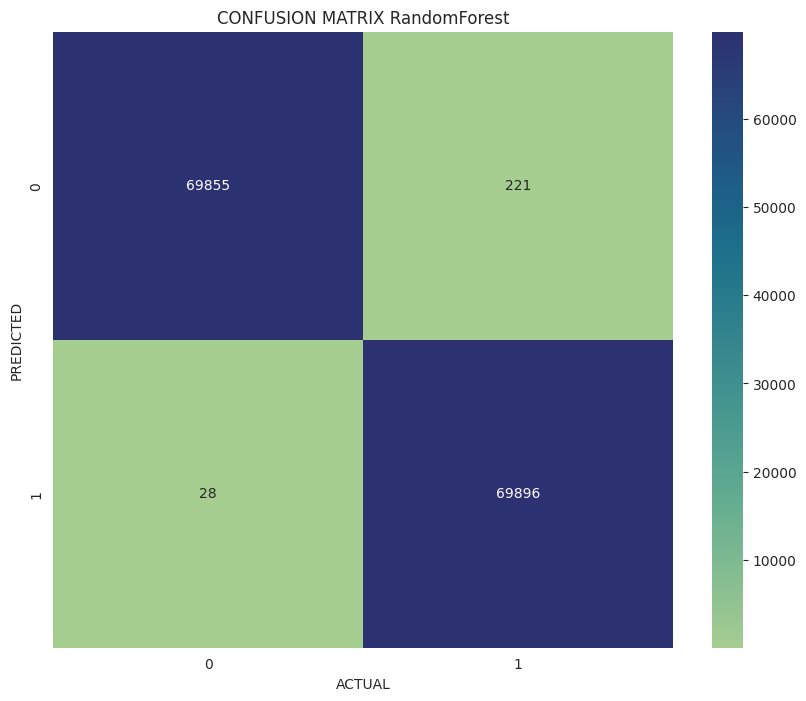

In [67]:
sns.set_style("dark")
plt.figure(figsize=(10,8))
plt.title("CONFUSION MATRIX RandomForest")
sns.heatmap(confusion_matrix(Y_test,RF_predicted),annot=True,cmap='crest',fmt='')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.show()

## Save model


In [68]:
import joblib

# Save the model to a file
joblib.dump(RF, 'RandomForestClassifier.joblib')


['RandomForestClassifier.joblib']

# LOAD MODEL

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
loaded_rf = joblib.load("RandomForestClassifier.joblib")

In [ ]:
#RF.predict([A])

# **Create  Features**

In [ ]:

df = pd.DataFrame({

    'name': ['Example Fundraiser'],
    'category': ['Web'],
    'main_category': ['Technology'],
    'currency': ['USD'],
    'deadline': ['2023-06-30'],
    'goal': [1000],
    'launched': ['2015-08-11 12:12:28'],
    'pledged': [500],
    'backers': [10],
    'country': ['US'],
    'usd pledged': [500],
    'usd_pledged_real': [500],
    'usd_goal_real': [1000]
})

In [ ]:
df

In [ ]:
#Create The Date Time As Features**

def filter_date(df,feature):
  global day_list,month_list,year_list,hour_list,min_list
  day_list = []
  month_list = []
  year_list = []
  hour_list = []
  min_list = []
  for data in df[feature]:
      if feature == 'deadline':
          data = data.split(" ")
          # Date Data
          date_data = data[0].split("-")
          # Storing data in list
          day_list.append(date_data[2])
          month_list.append(date_data[1])
          year_list.append(date_data[0])
      else:
          data = data.split(" ")
          # Date Data
          date_data = data[0].split("-")
          # Storing data in list
          day_list.append(date_data[2])
          month_list.append(date_data[1])
          year_list.append(date_data[0])
          # Time Data
          time_data = data[1].split(":")
          # Storing Time Data
          hour_list.append(time_data[0])
          min_list.append(time_data[1])

filter_date(df,'deadline')

df['deadline_day'] = [int(x) for x in day_list]     # Converting to int and storing it
df['deadline_month'] = [int(x) for x in month_list] # Converting to int and storing it
df['deadline_year'] = [int(x) for x in year_list]   # Converting to int and storing it


filter_date(df,'launched')

df['launched_day'] = [int(x) for x in day_list]     # Converting to int and storing it
df['launched_month'] = [int(x) for x in month_list] # Converting to int and storing it
df['launched_year'] = [int(x) for x in year_list]   # Converting to int and storing it

df['launched_hour'] = [int(x) for x in hour_list]     # Converting to int and storing it
df['launched_min'] = [int(x) for x in min_list] # Converting to int and storing it

df.drop(columns=['deadline','launched'],axis=1,inplace=True)


In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np

header = list(df.columns)
dummy_values = ['AUD','CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD']

# Create a new DataFrame with all zero values and the same index as the original DataFrame
new_df = pd.DataFrame(0, index=df.index, columns=header + dummy_values)

# Copy the old data from the original DataFrame to the new DataFrame
new_df[header] = df

df=new_df

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    currency = row['currency']  # Get the value in the 'currency' column
    if currency in df.columns:  # Check if it exists as a column header
        df.loc[index, currency] = 1  # Set the corresponding column data to 1

df.drop(columns=['currency'],axis=1,inplace=True)

In [ ]:
df

In [ ]:

# Read the CSV file and store the headers in a list
with open('header_only.csv', 'r') as file:
    headers = file.readline().strip().split(',')

# Create an empty DataFrame with zeros as the initial data
df2 = pd.DataFrame(0, index=np.arange(0), columns=headers)

# Delete the first 32 columns
df2 = df2.iloc[:, 20:]

# Print the initialized DataFrame
df2



In [ ]:
df

In [ ]:

# Concatenate the DataFrames column-wise
merged_df = pd.concat([df, df2], axis=1)

# Fill missing values with zero
merged_df = merged_df.fillna(0)

df= merged_df

In [ ]:
merged_df

In [ ]:
df.columns

In [ ]:

for index, row in df.iterrows():
    category = row['category']
    column_name = 'category_' + category

    if column_name in df.columns:
      df.loc[index, column_name] = 1


In [ ]:


for index, row in df.iterrows():
    main_category = row['main_category']
    column_name = 'main_category_' + main_category
    if column_name in df.columns:
      df.loc[index, column_name] = 1


In [ ]:


for index, row in df.iterrows():
    country = row['country']
    column_name = 'country_' + country
    if column_name in df.columns:
      df.loc[index, column_name] = 1

In [ ]:
df.to_csv('BF.csv',index=False)

In [ ]:
df

In [ ]:
df.drop(columns=['main_category','country','category','deadline_day','deadline_month','name'],axis=1,inplace=True)
df.drop(columns=['deadline_year','goal','pledged','usd pledged','usd_pledged_real','backers'],inplace=True,axis=1)

In [ ]:
df

In [ ]:

df.to_csv('AF.csv', index=False)

In [ ]:
df

### **Dimension Reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### **Scaling the features**

In [ ]:
df.shape

In [ ]:
scaled_X = StandardScaler().fit_transform(df)

In [ ]:
scaled_X

In [ ]:
scaled_X.shape

In [ ]:
df.shape

In [ ]:
RF.predict(scaled_X)